In [1]:
## Archivo de Entrenamiento
! gdown 16VokSvb2NI9fl6yUXClmZ-uYE2dSQZBe

Downloading...
From: https://drive.google.com/uc?id=16VokSvb2NI9fl6yUXClmZ-uYE2dSQZBe
To: /content/dfTrainV_20220814_V2.csv
100% 327M/327M [00:02<00:00, 133MB/s]


In [2]:
## Archivo de Submit
! gdown  1Z1aVCsUH3irtrDMQfldGimtzu8aP4-eO

Downloading...
From: https://drive.google.com/uc?id=1Z1aVCsUH3irtrDMQfldGimtzu8aP4-eO
To: /content/dfSubmitV_20220814_V2.csv
100% 109M/109M [00:01<00:00, 104MB/s]


In [3]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [4]:
# Pandas
import pandas as pd

# CatBoost
from catboost import CatBoostClassifier, Pool

# SKLearn
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, recall_score

# MatplotLib
from matplotlib import pyplot as plt

# Seaborn
import seaborn as sns

# Numpy
import numpy as np

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
dfTrain  = pd.read_csv('/content/dfTrainV_20220814_V2.csv' )
dfSubmit = pd.read_csv('/content/dfSubmitV_20220814_V2.csv' )

In [8]:
dfTrain.head()

,nro_telefono_hash,TIPO_ADQ,SCORECAT,MARCA,NUEVA_GAMMA,OS,DEVICE_TYPE,GIRO,SUBGIRO,TIENE_PROD_1,TIENE_PROD_2,TIENE_PROD_3,FLG_GRUPO1,FLG_GRUPO2,FLG_GRUPO4,FLG_GRUPO6,FLG_GRUPO7,FLG_GRUPO9,FLG_GRUPO10,FLG_GRUPO11,FLG_GRUPO16,FLG_TARGETPREV,TIPOEQUIPO,VCHMESADENDA,VCHPENALIDAD,DAYS_FECINGRESO,DAYS_FECACTCONT,DAYS_LANZAMIENT,mins_flujo_1,mins_flujo_2,flg_flujo,trafico_app_1,trafico_app_2,trafico_app_3,trafico_app_4,trafico_app_5,trafico_app_6,trafico_app_7,trafico_app_8,trafico_app_9,trafico_resto,apptoppreferida,flgusopreferente,TARGET
0,9be57e3928a78ae85be270575f97e82a6bdbd59fc87281...,tipo1,alto,e2f4e2c4b8d7cf9c17f5b7b3ec83bc02068bd673a2a87c...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,3e33e191fc2f1513037662f262867a04e278e8a0589a32...,8e0b81ed56b34766254d0492d32fa9d5d08a33690db2b6...,1,0,0,1,0,0,0,0,1,1,1,1,NO_INFORMACION,PROPIO,0.0,0.00,3988,1151,250,162.666667,334.983333,conflg_02,0.362702,1491.756171,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,15114.021472,trafico_app_2,usoresto,0
1,119dd6dff66e259a3996de7d885e2c54e8ed5874239346...,tipo1,alto,d4c6a5785b57062229039a79c714d3cb3a4dac4e3e63ef...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0,0,0,1,0,0,0,0,1,NO_INFORMACION,FINANCIADO,7.6,365.57,5997,1145,1601,652.466667,1465.866667,conflg_02,116.006533,411.665270,0.0,0.0,0.0,0.0,0.029129,180.536775,0.0,2996.985180,trafico_app_2,usoresto,0
2,73cec44593f362cccdb45773197a0bf2136978cb241c91...,tipo1,medio,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,76df0c6db32d4e04e0ef6a3a6a1e1686677e34308d9435...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,1,0,0,1,0,0,0,0,1,NO_INFORMACION,PROPIO,0.0,0.00,5997,1145,740,481.983333,299.100000,conflg_04,74.277843,1311.141026,0.0,0.0,0.0,0.0,12.869561,980.521564,0.0,2238.233796,trafico_app_2,usopreferido,0
3,db86e518af696d60b247466fd1bb5823cf81a9442c16b2...,tipo2,NOINFORMACION,NOINFORMACION,NOINFORMACION,NOINFORMACION,NOINFORMACION,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0,0,0,0,0,0,0,0,0,NO_INFORMACION,PROPIO,0.0,0.00,5997,1145,916,0.016667,0.000000,conflg_06,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,ninguna,usoresto,0
4,90d5ab1ad28da36b0fa821759b0a9df2b248dc92a557a5...,tipo1,alto,2a1022b922f5038bc5bff79ff2960cd12cf266647b4f59...,dc937b59892604f5a86ac96936cd7ff09e25f18ae6b758...,fb8e9c929bbc4ccaebcf8d68296c419464bdfaf01a6970...,SMARTPHONE,a9d0bcb92394bd06ed0e020135054d2dbf3e512fdf0b7f...,e159ded5abcf126e18b05856319e4a4ee58a3267f298fd...,1,0,0,0,0,0,0,0,0,0,0,1,NO_INFORMACION,PROPIO,0.0,0.00,5997,1145,916,205.416667,291.983333,conflg_03,25.465849,288.978822,0.0,0.0,0.0,0.0,1.113294,37.027894,0.0,97.467674,trafico_app_2,usopreferido,0


In [9]:
cat_features = ["TIPO_ADQ","SCORECAT",
## "MODELO",
"MARCA", "NUEVA_GAMMA","OS","DEVICE_TYPE",
"GIRO","SUBGIRO",
"TIENE_PROD_1","TIENE_PROD_2",
## "TIENE_PROD_3",
"FLG_GRUPO1", "FLG_GRUPO2","FLG_GRUPO4","FLG_GRUPO6","FLG_GRUPO7" ,
## "FLG_GRUPO3", "FLG_GRUPO5", "FLG_GRUPO8" ,
"FLG_GRUPO9","FLG_GRUPO10","FLG_GRUPO11","FLG_GRUPO16", "FLG_TARGETPREV","TIPOEQUIPO" , "apptoppreferida" , "flgusopreferente" , "flg_flujo"]

In [12]:
data   = dfTrain.drop(['nro_telefono_hash','TARGET'  , 'TIENE_PROD_3' ], axis=1)
data[cat_features] = data[cat_features].astype(str)
target = dfTrain['TARGET']

In [13]:
X_test = dfSubmit.drop(['nro_telefono_hash','TARGET'  , 'TIENE_PROD_3' ], axis=1)
X_test[cat_features] = X_test[cat_features].astype(str)
test_data = Pool(data=X_test,cat_features=cat_features)

In [14]:
print("Cantidad de Renovados    : {}".format(sum(target==1)))
print("Cantidad de No Renovados : {} \n".format(sum(target==0)))

Cantidad de Renovados    : 16419
Cantidad de No Renovados : 529873 



In [ ]:
529873  / 16419

32.27194104391254

In [15]:
# N_FOLDS               = 10
SEED                  = 2022
EARLY_STOPPING_ROUNDS = 100
VERBOSE               = 100

In [ ]:
### Depth 

In [16]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.01   ,
          'iterations'           : 1000   ,
          'depth'                : 5      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7531464	best: 0.7531464 (0)	total: 195ms	remaining: 3m 14s
100:	test: 0.7696418	best: 0.7696418 (100)	total: 6.21s	remaining: 55.3s
200:	test: 0.7760805	best: 0.7760805 (200)	total: 11.7s	remaining: 46.5s
300:	test: 0.7796146	best: 0.7796146 (300)	total: 17.2s	remaining: 40s
400:	test: 0.7811913	best: 0.7811913 (400)	total: 22.7s	remaining: 34s
500:	test: 0.7824342	best: 0.7824342 (500)	total: 28.2s	remaining: 28.1s
600:	test: 0.7832934	best: 0.7832948 (599)	total: 33.7s	remaining: 22.4s
700:	test: 0.7838414	best: 0.7838650 (692)	total: 39.2s	remaining: 16.7s
800:	test: 0.7842875	best: 0.7843007 (799)	total: 45.3s	remaining: 11.3s
900:	test: 0.7845398	best: 0.7845435 (898)	total: 50.8s	remaining: 5.59s
999:	test: 0.7848686	best: 0.7848757 (998)	total: 56.4s	remaining: 0us
bestTest = 0.7848757207
bestIteration = 998
Shrink model to first 999 iterations.
FOLD 0  AUCTRAINING 0.7954237233625736  AUC 0.7848757347399319 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7456317	best: 0.7456317 (0)	total: 62.3ms	remaining: 1m 2s
100:	test: 0.7622348	best: 0.7622372 (98)	total: 4.93s	remaining: 43.9s
200:	test: 0.7694126	best: 0.7694126 (200)	total: 10.4s	remaining: 41.2s
300:	test: 0.7732222	best: 0.7732222 (300)	total: 15.9s	remaining: 37s
400:	test: 0.7749806	best: 0.7749806 (400)	total: 21.5s	remaining: 32.1s
500:	test: 0.7763186	best: 0.7763231 (497)	total: 27s	remaining: 26.9s
600:	test: 0.7771824	best: 0.7771824 (600)	total: 32.6s	remaining: 21.6s
700:	test: 0.7778946	best: 0.7779017 (698)	total: 38.2s	remaining: 16.3s
800:	test: 0.7785180	best: 0.7785358 (799)	total: 43.7s	remaining: 10.8s
900:	test: 0.7791357	best: 0.7791529 (892)	total: 49.3s	remaining: 5.41s
999:	test: 0.7796222	best: 0.7796222 (999)	total: 54.8s	remaining: 0us
bestTest = 0.7796221673
bestIteration = 999
FOLD 1  AUCTRAINING 0.7960306023461088  AUC 0.7796221781467401 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7562163	best: 0.7562163 (0)	total: 62.8ms	remaining: 1m 2s
100:	test: 0.7717627	best: 0.7717627 (100)	total: 4.97s	remaining: 44.3s
200:	test: 0.7795339	best: 0.7795339 (200)	total: 11.1s	remaining: 44.1s
300:	test: 0.7830700	best: 0.7830700 (300)	total: 16.6s	remaining: 38.7s
400:	test: 0.7851081	best: 0.7851175 (399)	total: 22.3s	remaining: 33.2s
500:	test: 0.7864184	best: 0.7864184 (500)	total: 29.1s	remaining: 29s
600:	test: 0.7874506	best: 0.7874506 (600)	total: 34.7s	remaining: 23s
700:	test: 0.7882463	best: 0.7882463 (700)	total: 40.2s	remaining: 17.1s
800:	test: 0.7890036	best: 0.7890036 (800)	total: 45.9s	remaining: 11.4s
900:	test: 0.7895041	best: 0.7895246 (899)	total: 51.5s	remaining: 5.66s
999:	test: 0.7900395	best: 0.7900424 (997)	total: 57s	remaining: 0us
bestTest = 0.7900423706
bestIteration = 997
Shrink model to first 998 iterations.
FOLD 2  AUCTRAINING 0.7950949552359654  AUC 0.7900425018907847 

========FOLD3========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7455775	best: 0.7455775 (0)	total: 62.6ms	remaining: 1m 2s
100:	test: 0.7584456	best: 0.7584456 (100)	total: 5s	remaining: 44.5s
200:	test: 0.7651693	best: 0.7651693 (200)	total: 11.2s	remaining: 44.7s
300:	test: 0.7694392	best: 0.7694392 (300)	total: 23s	remaining: 53.4s
400:	test: 0.7719991	best: 0.7719991 (400)	total: 31.7s	remaining: 47.3s
500:	test: 0.7734410	best: 0.7734410 (500)	total: 41.3s	remaining: 41.1s
600:	test: 0.7745501	best: 0.7745501 (600)	total: 48.2s	remaining: 32s
700:	test: 0.7754511	best: 0.7754511 (700)	total: 54.9s	remaining: 23.4s
800:	test: 0.7761717	best: 0.7761717 (800)	total: 1m	remaining: 15s
900:	test: 0.7770862	best: 0.7770870 (899)	total: 1m 6s	remaining: 7.27s
999:	test: 0.7774501	best: 0.7774595 (998)	total: 1m 11s	remaining: 0us
bestTest = 0.7774594724
bestIteration = 998
Shrink model to first 999 iterations.
FOLD 3  AUCTRAINING 0.7959631955502317  AUC 0.7774595827942721 

========FOLD4========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7376486	best: 0.7376486 (0)	total: 62.9ms	remaining: 1m 2s
100:	test: 0.7567627	best: 0.7567627 (100)	total: 4.89s	remaining: 43.5s
200:	test: 0.7646752	best: 0.7646752 (200)	total: 10.4s	remaining: 41.5s
300:	test: 0.7694543	best: 0.7694543 (300)	total: 16s	remaining: 37.2s
400:	test: 0.7719956	best: 0.7719956 (400)	total: 21.6s	remaining: 32.3s
500:	test: 0.7739991	best: 0.7739991 (500)	total: 27.3s	remaining: 27.2s
600:	test: 0.7755105	best: 0.7755105 (600)	total: 32.9s	remaining: 21.8s
700:	test: 0.7766273	best: 0.7766273 (700)	total: 38.5s	remaining: 16.4s
800:	test: 0.7777973	best: 0.7778067 (796)	total: 44s	remaining: 10.9s
900:	test: 0.7789411	best: 0.7789411 (900)	total: 49.7s	remaining: 5.46s
999:	test: 0.7796702	best: 0.7796702 (999)	total: 55.2s	remaining: 0us
bestTest = 0.7796702087
bestIteration = 999
FOLD 4  AUCTRAINING 0.7955310382466358  AUC 0.7796702518925022 

========FOLD5========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7487052	best: 0.7487052 (0)	total: 64.7ms	remaining: 1m 4s
100:	test: 0.7628774	best: 0.7628774 (100)	total: 4.91s	remaining: 43.7s
200:	test: 0.7696472	best: 0.7696472 (200)	total: 10.5s	remaining: 41.6s
300:	test: 0.7738460	best: 0.7738460 (300)	total: 16s	remaining: 37.3s
400:	test: 0.7761746	best: 0.7761746 (400)	total: 21.7s	remaining: 32.4s
500:	test: 0.7778041	best: 0.7778041 (500)	total: 27.3s	remaining: 27.2s
600:	test: 0.7791646	best: 0.7791759 (599)	total: 33s	remaining: 21.9s
700:	test: 0.7800123	best: 0.7800133 (699)	total: 38.6s	remaining: 16.5s
800:	test: 0.7807759	best: 0.7807759 (800)	total: 44.2s	remaining: 11s
900:	test: 0.7815530	best: 0.7815591 (899)	total: 49.8s	remaining: 5.47s
999:	test: 0.7820362	best: 0.7820482 (996)	total: 55.3s	remaining: 0us
bestTest = 0.7820481658
bestIteration = 996
Shrink model to first 997 iterations.
FOLD 5  AUCTRAINING 0.7953107106256102  AUC 0.7820481821581636 

========FOLD6========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7518319	best: 0.7518319 (0)	total: 63.8ms	remaining: 1m 3s
100:	test: 0.7684598	best: 0.7684892 (99)	total: 4.96s	remaining: 44.2s
200:	test: 0.7756288	best: 0.7756288 (200)	total: 10.6s	remaining: 42s
300:	test: 0.7797086	best: 0.7797086 (300)	total: 16.2s	remaining: 37.5s
400:	test: 0.7823077	best: 0.7823077 (400)	total: 22.7s	remaining: 33.9s
500:	test: 0.7839964	best: 0.7839964 (500)	total: 28.3s	remaining: 28.2s
600:	test: 0.7853070	best: 0.7853087 (599)	total: 33.9s	remaining: 22.5s
700:	test: 0.7863449	best: 0.7863449 (700)	total: 39.4s	remaining: 16.8s
800:	test: 0.7870974	best: 0.7870974 (800)	total: 45.1s	remaining: 11.2s
900:	test: 0.7880102	best: 0.7880102 (900)	total: 50.7s	remaining: 5.57s
999:	test: 0.7887887	best: 0.7887920 (998)	total: 56.4s	remaining: 0us
bestTest = 0.7887919843
bestIteration = 998
Shrink model to first 999 iterations.
FOLD 6  AUCTRAINING 0.7944163185852354  AUC 0.7887920512849806 

========FOLD7========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7506017	best: 0.7506017 (0)	total: 62.2ms	remaining: 1m 2s
100:	test: 0.7691402	best: 0.7691402 (100)	total: 5.02s	remaining: 44.7s
200:	test: 0.7771312	best: 0.7771312 (200)	total: 10.5s	remaining: 41.9s
300:	test: 0.7818225	best: 0.7818225 (300)	total: 16.2s	remaining: 37.5s
400:	test: 0.7845837	best: 0.7845837 (400)	total: 21.8s	remaining: 32.5s
500:	test: 0.7861373	best: 0.7861471 (499)	total: 27.3s	remaining: 27.2s
600:	test: 0.7874668	best: 0.7874668 (600)	total: 33s	remaining: 21.9s
700:	test: 0.7884803	best: 0.7884817 (699)	total: 38.6s	remaining: 16.5s
800:	test: 0.7893896	best: 0.7893896 (800)	total: 45s	remaining: 11.2s
900:	test: 0.7900065	best: 0.7900151 (899)	total: 51.2s	remaining: 5.63s
999:	test: 0.7906859	best: 0.7906859 (999)	total: 56.8s	remaining: 0us
bestTest = 0.7906858921
bestIteration = 999
FOLD 7  AUCTRAINING 0.7947113504281871  AUC 0.7906859557191044 

========FOLD8========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7400672	best: 0.7400672 (0)	total: 62.2ms	remaining: 1m 2s
100:	test: 0.7555450	best: 0.7555450 (100)	total: 4.95s	remaining: 44.1s
200:	test: 0.7638344	best: 0.7638344 (200)	total: 10.5s	remaining: 41.9s
300:	test: 0.7689418	best: 0.7689418 (300)	total: 16.2s	remaining: 37.6s
400:	test: 0.7716464	best: 0.7716510 (399)	total: 21.8s	remaining: 32.6s
500:	test: 0.7732500	best: 0.7732503 (499)	total: 27.5s	remaining: 27.4s
600:	test: 0.7745089	best: 0.7745131 (599)	total: 33.1s	remaining: 22s
700:	test: 0.7754985	best: 0.7754985 (700)	total: 38.8s	remaining: 16.6s
800:	test: 0.7764677	best: 0.7764677 (800)	total: 44.5s	remaining: 11s
900:	test: 0.7770740	best: 0.7770757 (899)	total: 50.1s	remaining: 5.5s
999:	test: 0.7775113	best: 0.7775144 (998)	total: 55.6s	remaining: 0us
bestTest = 0.7775143683
bestIteration = 998
Shrink model to first 999 iterations.
FOLD 8  AUCTRAINING 0.7960374671023622  AUC 0.7775144246881321 

========FOLD9========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7299978	best: 0.7299978 (0)	total: 159ms	remaining: 2m 38s
100:	test: 0.7492684	best: 0.7492684 (100)	total: 6.31s	remaining: 56.2s
200:	test: 0.7581021	best: 0.7581021 (200)	total: 11.9s	remaining: 47.2s
300:	test: 0.7634953	best: 0.7634953 (300)	total: 17.5s	remaining: 40.7s
400:	test: 0.7666073	best: 0.7666073 (400)	total: 23.2s	remaining: 34.6s
500:	test: 0.7685872	best: 0.7685872 (500)	total: 28.8s	remaining: 28.7s
600:	test: 0.7704817	best: 0.7704817 (600)	total: 34.5s	remaining: 22.9s
700:	test: 0.7715422	best: 0.7715422 (700)	total: 40.1s	remaining: 17.1s
800:	test: 0.7724467	best: 0.7724467 (800)	total: 45.7s	remaining: 11.4s
900:	test: 0.7733012	best: 0.7733094 (898)	total: 51.3s	remaining: 5.64s
999:	test: 0.7742525	best: 0.7742529 (998)	total: 56.9s	remaining: 0us
bestTest = 0.7742528617
bestIteration = 998
Shrink model to first 999 iterations.
FOLD 9  AUCTRAINING 0.7953916640099195  AUC 0.7742528577839065 

AUC 0.7824676912851709



In [17]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.02   ,
          'iterations'           : 1500   ,
          'depth'                : 5      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7531464	best: 0.7531464 (0)	total: 62.3ms	remaining: 1m 33s
100:	test: 0.7761362	best: 0.7761362 (100)	total: 5.31s	remaining: 1m 13s
200:	test: 0.7815363	best: 0.7815363 (200)	total: 10.9s	remaining: 1m 10s
300:	test: 0.7831048	best: 0.7831480 (288)	total: 16.5s	remaining: 1m 5s
400:	test: 0.7839420	best: 0.7839420 (400)	total: 22.7s	remaining: 1m 2s
500:	test: 0.7843453	best: 0.7843701 (496)	total: 28.7s	remaining: 57.2s
600:	test: 0.7850563	best: 0.7850890 (586)	total: 34.4s	remaining: 51.4s
700:	test: 0.7853294	best: 0.7854105 (695)	total: 40s	remaining: 45.6s
800:	test: 0.7856638	best: 0.7856831 (799)	total: 45.6s	remaining: 39.8s
900:	test: 0.7857896	best: 0.7857896 (900)	total: 51.2s	remaining: 34s
1000:	test: 0.7859945	best: 0.7859945 (1000)	total: 56.8s	remaining: 28.3s
1100:	test: 0.7862231	best: 0.7862382 (1088)	total: 1m 2s	remaining: 22.6s
1200:	test: 0.7861887	best: 0.7862864 (1172)	total: 1m 12s	remaining: 17.9s
1300:	test: 0.7862782	best: 0.7863500 (1290)	tot

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7456317	best: 0.7456317 (0)	total: 65.6ms	remaining: 1m 38s
100:	test: 0.7692362	best: 0.7692362 (100)	total: 5.32s	remaining: 1m 13s
200:	test: 0.7750770	best: 0.7750770 (200)	total: 11s	remaining: 1m 11s
300:	test: 0.7772994	best: 0.7772994 (300)	total: 17.7s	remaining: 1m 10s
400:	test: 0.7787549	best: 0.7788292 (396)	total: 23.4s	remaining: 1m 4s
500:	test: 0.7795320	best: 0.7795320 (500)	total: 29.1s	remaining: 58s
600:	test: 0.7805818	best: 0.7805818 (600)	total: 34.7s	remaining: 51.9s
700:	test: 0.7812171	best: 0.7812310 (699)	total: 40.4s	remaining: 46s
800:	test: 0.7819064	best: 0.7819466 (796)	total: 46s	remaining: 40.1s
900:	test: 0.7822055	best: 0.7822380 (896)	total: 51.7s	remaining: 34.3s
1000:	test: 0.7824969	best: 0.7824969 (1000)	total: 57.3s	remaining: 28.5s
1100:	test: 0.7828930	best: 0.7828930 (1100)	total: 1m 2s	remaining: 22.8s
1200:	test: 0.7831914	best: 0.7831927 (1198)	total: 1m 8s	remaining: 17s
1300:	test: 0.7833640	best: 0.7833672 (1298)	total: 1m

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7562163	best: 0.7562163 (0)	total: 65.7ms	remaining: 1m 38s
100:	test: 0.7794855	best: 0.7794855 (100)	total: 5.62s	remaining: 1m 17s
200:	test: 0.7855968	best: 0.7855968 (200)	total: 12.3s	remaining: 1m 19s
300:	test: 0.7880013	best: 0.7880013 (300)	total: 17.9s	remaining: 1m 11s
400:	test: 0.7895769	best: 0.7895797 (399)	total: 23.6s	remaining: 1m 4s
500:	test: 0.7906631	best: 0.7906631 (500)	total: 29.3s	remaining: 58.5s
600:	test: 0.7914146	best: 0.7914146 (600)	total: 35s	remaining: 52.3s
700:	test: 0.7917154	best: 0.7917376 (690)	total: 40.7s	remaining: 46.3s
800:	test: 0.7922045	best: 0.7922191 (799)	total: 46.2s	remaining: 40.3s
900:	test: 0.7924249	best: 0.7924383 (846)	total: 51.9s	remaining: 34.5s
1000:	test: 0.7926578	best: 0.7927004 (952)	total: 57.5s	remaining: 28.6s
1100:	test: 0.7929115	best: 0.7929115 (1100)	total: 1m 3s	remaining: 22.9s
1200:	test: 0.7931929	best: 0.7932242 (1186)	total: 1m 8s	remaining: 17.1s
1300:	test: 0.7933886	best: 0.7933886 (1300)	to

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7455775	best: 0.7455775 (0)	total: 63.4ms	remaining: 1m 35s
100:	test: 0.7664317	best: 0.7664317 (100)	total: 5.42s	remaining: 1m 15s
200:	test: 0.7720745	best: 0.7720745 (200)	total: 11s	remaining: 1m 11s
300:	test: 0.7746998	best: 0.7746998 (300)	total: 16.6s	remaining: 1m 6s
400:	test: 0.7767932	best: 0.7767932 (400)	total: 22.3s	remaining: 1m 1s
500:	test: 0.7781053	best: 0.7781053 (500)	total: 27.9s	remaining: 55.7s
600:	test: 0.7788287	best: 0.7788409 (593)	total: 33.6s	remaining: 50.2s
700:	test: 0.7797878	best: 0.7798031 (698)	total: 39.2s	remaining: 44.7s
800:	test: 0.7800189	best: 0.7800189 (800)	total: 44.9s	remaining: 39.2s
900:	test: 0.7805661	best: 0.7806056 (897)	total: 50.6s	remaining: 33.6s
1000:	test: 0.7808714	best: 0.7808821 (988)	total: 56.3s	remaining: 28.1s
1100:	test: 0.7809793	best: 0.7809793 (1100)	total: 1m 1s	remaining: 22.4s
1200:	test: 0.7812095	best: 0.7812095 (1200)	total: 1m 7s	remaining: 16.8s
1300:	test: 0.7814902	best: 0.7814972 (1295)	tot

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7376486	best: 0.7376486 (0)	total: 62.7ms	remaining: 1m 34s
100:	test: 0.7656098	best: 0.7656098 (100)	total: 5.37s	remaining: 1m 14s
200:	test: 0.7723617	best: 0.7724382 (198)	total: 11s	remaining: 1m 10s
300:	test: 0.7756705	best: 0.7756705 (300)	total: 16.6s	remaining: 1m 6s
400:	test: 0.7777278	best: 0.7777278 (400)	total: 22.2s	remaining: 1m
500:	test: 0.7791524	best: 0.7791569 (496)	total: 27.8s	remaining: 55.4s
600:	test: 0.7803462	best: 0.7803462 (600)	total: 33.4s	remaining: 49.9s
700:	test: 0.7815485	best: 0.7815485 (700)	total: 39s	remaining: 44.4s
800:	test: 0.7825216	best: 0.7825216 (800)	total: 44.6s	remaining: 38.9s
900:	test: 0.7833165	best: 0.7833407 (898)	total: 50.2s	remaining: 33.4s
1000:	test: 0.7840152	best: 0.7840168 (998)	total: 55.8s	remaining: 27.8s
1100:	test: 0.7845434	best: 0.7845434 (1100)	total: 1m 1s	remaining: 22.3s
1200:	test: 0.7847477	best: 0.7847683 (1133)	total: 1m 7s	remaining: 16.7s
1300:	test: 0.7849730	best: 0.7849940 (1278)	total: 1

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7487052	best: 0.7487052 (0)	total: 63.8ms	remaining: 1m 35s
100:	test: 0.7691857	best: 0.7691857 (100)	total: 5.38s	remaining: 1m 14s
200:	test: 0.7764135	best: 0.7764135 (200)	total: 11s	remaining: 1m 11s
300:	test: 0.7791330	best: 0.7791330 (300)	total: 16.6s	remaining: 1m 6s
400:	test: 0.7810295	best: 0.7810640 (399)	total: 22.2s	remaining: 1m
500:	test: 0.7821089	best: 0.7821089 (500)	total: 27.8s	remaining: 55.4s
600:	test: 0.7828724	best: 0.7829617 (590)	total: 33.4s	remaining: 49.9s
700:	test: 0.7836258	best: 0.7836884 (693)	total: 39s	remaining: 44.5s
800:	test: 0.7841180	best: 0.7841180 (800)	total: 44.7s	remaining: 39s
900:	test: 0.7848615	best: 0.7848730 (870)	total: 50.3s	remaining: 33.4s
1000:	test: 0.7851797	best: 0.7851930 (950)	total: 55.9s	remaining: 27.8s
1100:	test: 0.7853470	best: 0.7853593 (1098)	total: 1m 1s	remaining: 22.3s
1200:	test: 0.7858511	best: 0.7858511 (1200)	total: 1m 7s	remaining: 16.7s
1300:	test: 0.7863042	best: 0.7863110 (1299)	total: 1m 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7518319	best: 0.7518319 (0)	total: 62.1ms	remaining: 1m 33s
100:	test: 0.7757506	best: 0.7757506 (100)	total: 5.34s	remaining: 1m 14s
200:	test: 0.7821349	best: 0.7821349 (200)	total: 11s	remaining: 1m 10s
300:	test: 0.7847444	best: 0.7847455 (299)	total: 16.6s	remaining: 1m 5s
400:	test: 0.7865791	best: 0.7865791 (400)	total: 22.1s	remaining: 1m
500:	test: 0.7880858	best: 0.7880858 (500)	total: 27.8s	remaining: 55.4s
600:	test: 0.7891479	best: 0.7891479 (600)	total: 33.4s	remaining: 50s
700:	test: 0.7901355	best: 0.7901355 (700)	total: 39s	remaining: 44.5s
800:	test: 0.7914146	best: 0.7914146 (800)	total: 44.6s	remaining: 38.9s
900:	test: 0.7924177	best: 0.7924449 (891)	total: 50.2s	remaining: 33.4s
1000:	test: 0.7932421	best: 0.7932421 (1000)	total: 55.9s	remaining: 27.9s
1100:	test: 0.7939924	best: 0.7940153 (1085)	total: 1m 1s	remaining: 22.3s
1200:	test: 0.7947030	best: 0.7947030 (1200)	total: 1m 7s	remaining: 16.7s
1300:	test: 0.7950344	best: 0.7951389 (1285)	total: 1m

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7506017	best: 0.7506017 (0)	total: 75.3ms	remaining: 1m 52s
100:	test: 0.7764622	best: 0.7764622 (100)	total: 5.32s	remaining: 1m 13s
200:	test: 0.7844359	best: 0.7844359 (200)	total: 10.9s	remaining: 1m 10s
300:	test: 0.7873047	best: 0.7873088 (299)	total: 16.5s	remaining: 1m 5s
400:	test: 0.7892334	best: 0.7892334 (400)	total: 22.1s	remaining: 1m
500:	test: 0.7906435	best: 0.7906448 (499)	total: 27.7s	remaining: 55.3s
600:	test: 0.7918292	best: 0.7918324 (599)	total: 33.4s	remaining: 50s
700:	test: 0.7924773	best: 0.7924773 (700)	total: 39.1s	remaining: 44.5s
800:	test: 0.7928446	best: 0.7928446 (800)	total: 44.7s	remaining: 39s
900:	test: 0.7931927	best: 0.7931955 (899)	total: 50.3s	remaining: 33.4s
1000:	test: 0.7931871	best: 0.7932452 (943)	total: 56s	remaining: 27.9s
1100:	test: 0.7935230	best: 0.7935448 (1095)	total: 1m 2s	remaining: 22.7s
1200:	test: 0.7936915	best: 0.7937342 (1199)	total: 1m 8s	remaining: 17s
1300:	test: 0.7937749	best: 0.7938716 (1288)	total: 1m 14

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7400672	best: 0.7400672 (0)	total: 64.5ms	remaining: 1m 36s
100:	test: 0.7641810	best: 0.7641810 (100)	total: 5.31s	remaining: 1m 13s
200:	test: 0.7714193	best: 0.7714193 (200)	total: 10.9s	remaining: 1m 10s
300:	test: 0.7742236	best: 0.7742384 (298)	total: 16.5s	remaining: 1m 5s
400:	test: 0.7758432	best: 0.7758572 (399)	total: 22.1s	remaining: 1m
500:	test: 0.7769644	best: 0.7770140 (489)	total: 27.7s	remaining: 55.3s
600:	test: 0.7780194	best: 0.7780194 (600)	total: 33.3s	remaining: 49.8s
700:	test: 0.7787576	best: 0.7787748 (699)	total: 38.9s	remaining: 44.3s
800:	test: 0.7794534	best: 0.7794534 (800)	total: 44.5s	remaining: 38.8s
900:	test: 0.7799761	best: 0.7799868 (899)	total: 50.1s	remaining: 33.3s
1000:	test: 0.7803942	best: 0.7804306 (975)	total: 55.7s	remaining: 27.8s
1100:	test: 0.7807668	best: 0.7808864 (1080)	total: 1m 2s	remaining: 22.6s
1200:	test: 0.7811771	best: 0.7811932 (1198)	total: 1m 7s	remaining: 16.9s
1300:	test: 0.7815836	best: 0.7815836 (1300)	tota

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7299978	best: 0.7299978 (0)	total: 62.8ms	remaining: 1m 34s
100:	test: 0.7581390	best: 0.7581390 (100)	total: 5.38s	remaining: 1m 14s
200:	test: 0.7665808	best: 0.7665808 (200)	total: 11s	remaining: 1m 11s
300:	test: 0.7702051	best: 0.7702051 (300)	total: 16.6s	remaining: 1m 6s
400:	test: 0.7724511	best: 0.7724511 (400)	total: 22.2s	remaining: 1m
500:	test: 0.7743495	best: 0.7743495 (500)	total: 27.8s	remaining: 55.4s
600:	test: 0.7756756	best: 0.7756756 (600)	total: 33.4s	remaining: 49.9s
700:	test: 0.7763173	best: 0.7763591 (689)	total: 39s	remaining: 44.5s
800:	test: 0.7769446	best: 0.7769446 (800)	total: 44.7s	remaining: 39s
900:	test: 0.7778357	best: 0.7778679 (896)	total: 50.3s	remaining: 33.4s
1000:	test: 0.7781710	best: 0.7781710 (1000)	total: 56.3s	remaining: 28.1s
1100:	test: 0.7786258	best: 0.7786258 (1100)	total: 1m 2s	remaining: 22.7s
1200:	test: 0.7789205	best: 0.7789872 (1187)	total: 1m 8s	remaining: 17s
1300:	test: 0.7790930	best: 0.7791194 (1283)	total: 1m 1

In [19]:
exportar_final = pd.DataFrame(
    {'nro_telefono_hash' : dfSubmit["nro_telefono_hash"],
     'TARGET'            : pred
    })

exportar_final.to_csv('Submit20220815_V1.csv', index=False)

Text(0.5, 1.0, 'CatBoost features importance:')

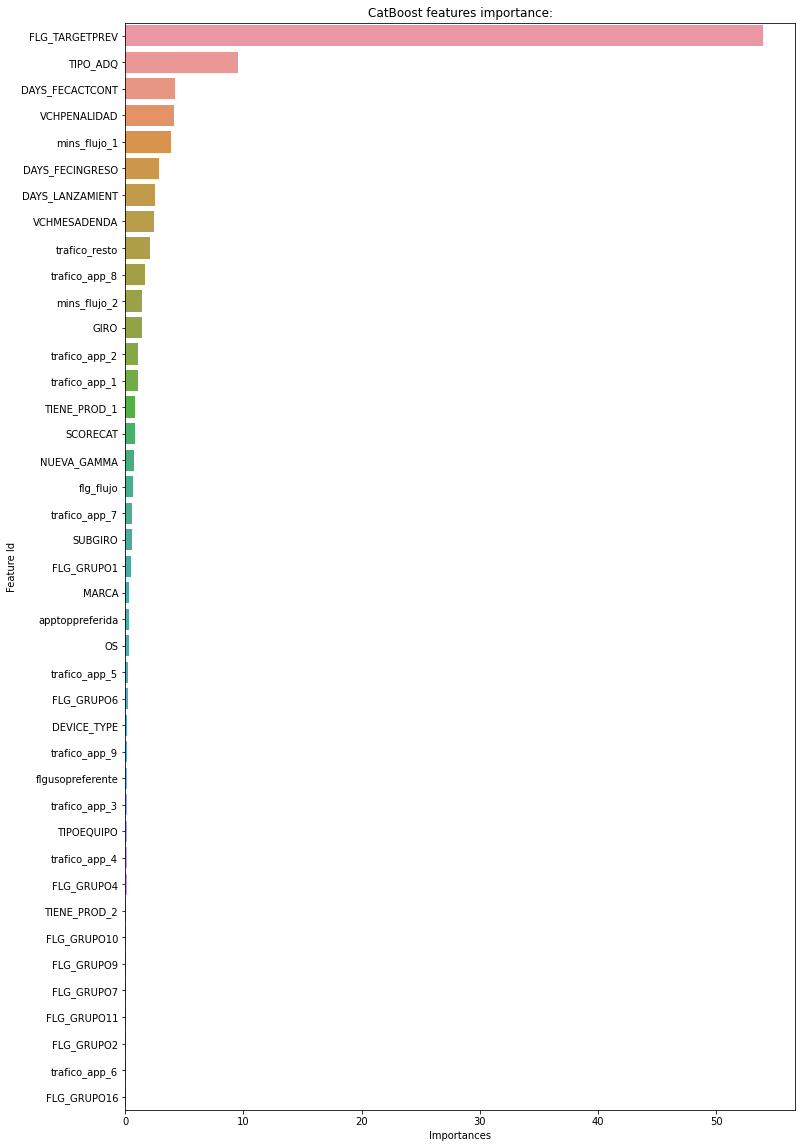

In [20]:
fi = model.get_feature_importance(prettified=True)
plt.figure(figsize=(12, 20));
sns.barplot(x="Importances", y="Feature Id", data=fi);
plt.title('CatBoost features importance:')


In [24]:
model.save_model('modelocastboost_20220814')

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.02   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7589096	best: 0.7589096 (100)	total: 2.38s	remaining: 33s
200:	test: 0.7694431	best: 0.7694431 (200)	total: 4.74s	remaining: 30.6s
300:	test: 0.7746103	best: 0.7746103 (300)	total: 7.1s	remaining: 28.3s
400:	test: 0.7771393	best: 0.7771393 (400)	total: 9.44s	remaining: 25.9s
500:	test: 0.7789149	best: 0.7789149 (500)	total: 11.8s	remaining: 23.5s
600:	test: 0.7815482	best: 0.7815588 (598)	total: 14.2s	remaining: 21.3s
700:	test: 0.7836846	best: 0.7836846 (700)	total: 16.6s	remaining: 19s
800:	test: 0.7845399	best: 0.7845511 (798)	total: 19s	remaining: 16.6s
900:	test: 0.7851077	best: 0.7851098 (898)	total: 21.4s	remaining: 14.2s
1000:	test: 0.7856485	best: 0.7856723 (994)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7858130	best: 0.7859703 (1036)	total: 26.2s	remaining: 9.5s
1200:	test: 0.7866754	best: 0.7866754 (1200)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7874513	best: 0.7874625 (1297)	total: 31s	r

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7525901	best: 0.7525901 (100)	total: 2.37s	remaining: 32.8s
200:	test: 0.7640150	best: 0.7640150 (200)	total: 4.73s	remaining: 30.6s
300:	test: 0.7689688	best: 0.7689688 (300)	total: 7.05s	remaining: 28.1s
400:	test: 0.7721582	best: 0.7721664 (397)	total: 9.39s	remaining: 25.7s
500:	test: 0.7748222	best: 0.7748357 (496)	total: 12.4s	remaining: 24.7s
600:	test: 0.7771791	best: 0.7771791 (600)	total: 15.3s	remaining: 22.9s
700:	test: 0.7797999	best: 0.7797999 (700)	total: 17.8s	remaining: 20.2s
800:	test: 0.7808704	best: 0.7808884 (792)	total: 20.2s	remaining: 17.6s
900:	test: 0.7818165	best: 0.7818386 (897)	total: 22.6s	remaining: 15s
1000:	test: 0.7823632	best: 0.7823632 (1000)	total: 25s	remaining: 12.4s
1100:	test: 0.7828842	best: 0.7828845 (1094)	total: 27.3s	remaining: 9.91s
1200:	test: 0.7837693	best: 0.7837850 (1188)	total: 29.7s	remaining: 7.39s
1300:	test: 0.7844695	best: 0.7844695 (1300)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 30.7ms	remaining: 46.1s
100:	test: 0.7618994	best: 0.7618994 (100)	total: 2.37s	remaining: 32.9s
200:	test: 0.7731833	best: 0.7731833 (200)	total: 4.73s	remaining: 30.5s
300:	test: 0.7801308	best: 0.7801308 (300)	total: 7.1s	remaining: 28.3s
400:	test: 0.7837752	best: 0.7837752 (400)	total: 9.44s	remaining: 25.9s
500:	test: 0.7869276	best: 0.7869390 (499)	total: 11.9s	remaining: 23.6s
600:	test: 0.7891218	best: 0.7891218 (600)	total: 14.2s	remaining: 21.3s
700:	test: 0.7911268	best: 0.7911363 (697)	total: 16.7s	remaining: 19s
800:	test: 0.7918530	best: 0.7918530 (800)	total: 19.1s	remaining: 16.6s
900:	test: 0.7924383	best: 0.7924504 (899)	total: 21.4s	remaining: 14.2s
1000:	test: 0.7930677	best: 0.7930691 (999)	total: 23.8s	remaining: 11.8s
1100:	test: 0.7934892	best: 0.7934929 (1096)	total: 26.2s	remaining: 9.49s
1200:	test: 0.7940736	best: 0.7940736 (1200)	total: 28.6s	remaining: 7.11s
1300:	test: 0.7946094	best: 0.7946148 (1298)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.2ms	remaining: 45.3s
100:	test: 0.7476879	best: 0.7476879 (100)	total: 2.38s	remaining: 33s
200:	test: 0.7574490	best: 0.7574490 (200)	total: 4.74s	remaining: 30.7s
300:	test: 0.7626973	best: 0.7626973 (300)	total: 7.12s	remaining: 28.4s
400:	test: 0.7663611	best: 0.7663611 (400)	total: 9.5s	remaining: 26s
500:	test: 0.7701338	best: 0.7701338 (500)	total: 11.9s	remaining: 23.8s
600:	test: 0.7741416	best: 0.7741456 (592)	total: 14.3s	remaining: 21.4s
700:	test: 0.7764581	best: 0.7764748 (697)	total: 16.7s	remaining: 19.1s
800:	test: 0.7787928	best: 0.7787974 (799)	total: 19.1s	remaining: 16.7s
900:	test: 0.7800146	best: 0.7800326 (890)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7813854	best: 0.7813854 (1000)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7825615	best: 0.7825621 (1095)	total: 26.4s	remaining: 9.55s
1200:	test: 0.7831684	best: 0.7831684 (1200)	total: 28.8s	remaining: 7.16s
1300:	test: 0.7836213	best: 0.7836336 (1298)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 30.7ms	remaining: 46s
100:	test: 0.7457859	best: 0.7457859 (100)	total: 2.39s	remaining: 33.1s
200:	test: 0.7581540	best: 0.7581790 (197)	total: 4.73s	remaining: 30.5s
300:	test: 0.7651173	best: 0.7651173 (300)	total: 7.07s	remaining: 28.2s
400:	test: 0.7677737	best: 0.7677805 (398)	total: 9.45s	remaining: 25.9s
500:	test: 0.7711535	best: 0.7711535 (500)	total: 11.8s	remaining: 23.6s
600:	test: 0.7736284	best: 0.7736416 (598)	total: 14.2s	remaining: 21.3s
700:	test: 0.7759050	best: 0.7759050 (700)	total: 16.7s	remaining: 19s
800:	test: 0.7770555	best: 0.7770555 (800)	total: 19.1s	remaining: 16.6s
900:	test: 0.7780288	best: 0.7780288 (900)	total: 21.4s	remaining: 14.2s
1000:	test: 0.7789548	best: 0.7789548 (999)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7804970	best: 0.7805113 (1098)	total: 26.2s	remaining: 9.48s
1200:	test: 0.7811077	best: 0.7811086 (1199)	total: 28.6s	remaining: 7.11s
1300:	test: 0.7823753	best: 0.7823839 (1299)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.4ms	remaining: 45.5s
100:	test: 0.7532486	best: 0.7532486 (100)	total: 2.38s	remaining: 33s
200:	test: 0.7631698	best: 0.7631698 (200)	total: 4.73s	remaining: 30.6s
300:	test: 0.7686077	best: 0.7686077 (300)	total: 7.12s	remaining: 28.4s
400:	test: 0.7716050	best: 0.7716084 (399)	total: 9.5s	remaining: 26s
500:	test: 0.7745959	best: 0.7745959 (500)	total: 11.9s	remaining: 23.6s
600:	test: 0.7771770	best: 0.7771770 (600)	total: 14.3s	remaining: 21.3s
700:	test: 0.7794787	best: 0.7794787 (700)	total: 16.7s	remaining: 19s
800:	test: 0.7810278	best: 0.7810278 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7817551	best: 0.7817551 (900)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7826210	best: 0.7826272 (989)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7831397	best: 0.7831777 (1088)	total: 26.2s	remaining: 9.5s
1200:	test: 0.7835685	best: 0.7835685 (1200)	total: 28.6s	remaining: 7.12s
1300:	test: 0.7843008	best: 0.7843008 (1300)	total: 31s	r

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 31.3ms	remaining: 46.9s
100:	test: 0.7592821	best: 0.7592821 (100)	total: 2.39s	remaining: 33.1s
200:	test: 0.7693900	best: 0.7693900 (200)	total: 4.73s	remaining: 30.6s
300:	test: 0.7743819	best: 0.7743819 (300)	total: 7.07s	remaining: 28.2s
400:	test: 0.7778687	best: 0.7778687 (400)	total: 9.47s	remaining: 26s
500:	test: 0.7806784	best: 0.7806784 (500)	total: 11.9s	remaining: 23.7s
600:	test: 0.7826890	best: 0.7826909 (599)	total: 14.2s	remaining: 21.3s
700:	test: 0.7853584	best: 0.7853584 (700)	total: 16.7s	remaining: 19s
800:	test: 0.7867875	best: 0.7867875 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7876848	best: 0.7876848 (900)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7887805	best: 0.7887805 (1000)	total: 24.9s	remaining: 12.4s
1100:	test: 0.7892038	best: 0.7892038 (1100)	total: 27.2s	remaining: 9.87s
1200:	test: 0.7900312	best: 0.7900312 (1200)	total: 29.6s	remaining: 7.37s
1300:	test: 0.7909101	best: 0.7909127 (1298)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 30.2ms	remaining: 45.3s
100:	test: 0.7583938	best: 0.7583938 (100)	total: 2.38s	remaining: 33s
200:	test: 0.7701894	best: 0.7701929 (199)	total: 4.74s	remaining: 30.6s
300:	test: 0.7766401	best: 0.7766401 (300)	total: 7.1s	remaining: 28.3s
400:	test: 0.7799329	best: 0.7799360 (398)	total: 9.47s	remaining: 26s
500:	test: 0.7833590	best: 0.7833744 (499)	total: 11.9s	remaining: 23.8s
600:	test: 0.7856764	best: 0.7856824 (599)	total: 14.3s	remaining: 21.4s
700:	test: 0.7876125	best: 0.7876125 (700)	total: 16.7s	remaining: 19.1s
800:	test: 0.7886018	best: 0.7886018 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7895388	best: 0.7895398 (898)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7911194	best: 0.7911194 (1000)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7921007	best: 0.7921007 (1100)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7931741	best: 0.7931774 (1199)	total: 28.7s	remaining: 7.15s
1300:	test: 0.7937868	best: 0.7937913 (1294)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 31.4ms	remaining: 47.1s
100:	test: 0.7452184	best: 0.7452184 (100)	total: 2.45s	remaining: 33.9s
200:	test: 0.7575210	best: 0.7575210 (200)	total: 4.82s	remaining: 31.1s
300:	test: 0.7665931	best: 0.7665931 (300)	total: 7.21s	remaining: 28.7s
400:	test: 0.7708689	best: 0.7708689 (400)	total: 9.59s	remaining: 26.3s
500:	test: 0.7738957	best: 0.7738957 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7761686	best: 0.7761686 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7784998	best: 0.7784998 (700)	total: 16.8s	remaining: 19.1s
800:	test: 0.7798238	best: 0.7798661 (794)	total: 19.1s	remaining: 16.7s
900:	test: 0.7806529	best: 0.7806551 (896)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7815604	best: 0.7815915 (998)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7821411	best: 0.7821437 (1099)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7827138	best: 0.7827289 (1197)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7831118	best: 0.7831163 (1299)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7378396	best: 0.7378396 (100)	total: 2.37s	remaining: 32.8s
200:	test: 0.7520042	best: 0.7520042 (200)	total: 6.07s	remaining: 39.2s
300:	test: 0.7595713	best: 0.7595713 (300)	total: 8.41s	remaining: 33.5s
400:	test: 0.7644032	best: 0.7644032 (400)	total: 10.8s	remaining: 29.6s
500:	test: 0.7682656	best: 0.7682656 (500)	total: 13.2s	remaining: 26.3s
600:	test: 0.7709079	best: 0.7709079 (600)	total: 15.6s	remaining: 23.3s
700:	test: 0.7730087	best: 0.7730087 (700)	total: 18s	remaining: 20.5s
800:	test: 0.7746873	best: 0.7747072 (794)	total: 20.4s	remaining: 17.8s
900:	test: 0.7760984	best: 0.7761201 (895)	total: 22.8s	remaining: 15.1s
1000:	test: 0.7776508	best: 0.7776524 (999)	total: 25.2s	remaining: 12.6s
1100:	test: 0.7785176	best: 0.7785176 (1100)	total: 27.6s	remaining: 10s
1200:	test: 0.7795369	best: 0.7795369 (1200)	total: 30s	remaining: 7.47s
1300:	test: 0.7803880	best: 0.7803895 (1299)	total: 32.

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.03   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7655214	best: 0.7655214 (100)	total: 2.42s	remaining: 33.6s
200:	test: 0.7747726	best: 0.7747900 (199)	total: 4.75s	remaining: 30.7s
300:	test: 0.7787097	best: 0.7787097 (300)	total: 7.16s	remaining: 28.5s
400:	test: 0.7820724	best: 0.7820724 (400)	total: 9.52s	remaining: 26.1s
500:	test: 0.7833280	best: 0.7833469 (497)	total: 11.9s	remaining: 23.7s
600:	test: 0.7856523	best: 0.7856875 (594)	total: 14.3s	remaining: 21.4s
700:	test: 0.7866163	best: 0.7866164 (697)	total: 16.7s	remaining: 19s
800:	test: 0.7873536	best: 0.7873591 (799)	total: 19.1s	remaining: 16.7s
900:	test: 0.7884316	best: 0.7884648 (884)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7889249	best: 0.7889696 (931)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7893049	best: 0.7894008 (1057)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7896847	best: 0.7896987 (1195)	total: 28.8s	remaining: 7.16s
1300:	test: 0.7899561	best: 0.7899635 (1276)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7575838	best: 0.7575838 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7690080	best: 0.7690080 (200)	total: 4.75s	remaining: 30.7s
300:	test: 0.7722786	best: 0.7722786 (300)	total: 7.11s	remaining: 28.3s
400:	test: 0.7760580	best: 0.7760620 (397)	total: 9.51s	remaining: 26.1s
500:	test: 0.7783656	best: 0.7784173 (491)	total: 11.9s	remaining: 23.7s
600:	test: 0.7798913	best: 0.7799056 (595)	total: 14.3s	remaining: 21.4s
700:	test: 0.7820610	best: 0.7820629 (699)	total: 16.7s	remaining: 19s
800:	test: 0.7831603	best: 0.7831646 (757)	total: 19.1s	remaining: 16.7s
900:	test: 0.7840471	best: 0.7840735 (897)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7842970	best: 0.7842970 (999)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7849465	best: 0.7849512 (1097)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7855964	best: 0.7856020 (1195)	total: 28.7s	remaining: 7.15s
1300:	test: 0.7859395	best: 0.7859397 (1299)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 30.9ms	remaining: 46.4s
100:	test: 0.7680067	best: 0.7680067 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7801901	best: 0.7801901 (200)	total: 4.78s	remaining: 30.9s
300:	test: 0.7866209	best: 0.7866209 (300)	total: 7.16s	remaining: 28.5s
400:	test: 0.7903062	best: 0.7903062 (400)	total: 9.55s	remaining: 26.2s
500:	test: 0.7924301	best: 0.7924396 (499)	total: 11.9s	remaining: 23.7s
600:	test: 0.7937042	best: 0.7937042 (600)	total: 14.3s	remaining: 21.3s
700:	test: 0.7948575	best: 0.7948575 (697)	total: 16.6s	remaining: 19s
800:	test: 0.7954708	best: 0.7954708 (800)	total: 19s	remaining: 16.6s
900:	test: 0.7959438	best: 0.7959575 (898)	total: 21.4s	remaining: 14.2s
1000:	test: 0.7962846	best: 0.7963061 (987)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7964692	best: 0.7965043 (1090)	total: 26.2s	remaining: 9.5s
1200:	test: 0.7967318	best: 0.7967318 (1200)	total: 28.6s	remaining: 7.12s
1300:	test: 0.7968061	best: 0.7968146 (1298)	total: 31

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.1ms	remaining: 45.2s
100:	test: 0.7533855	best: 0.7534869 (99)	total: 2.44s	remaining: 33.9s
200:	test: 0.7622069	best: 0.7622069 (200)	total: 4.78s	remaining: 30.9s
300:	test: 0.7666046	best: 0.7666046 (300)	total: 7.12s	remaining: 28.4s
400:	test: 0.7736277	best: 0.7736277 (400)	total: 9.51s	remaining: 26.1s
500:	test: 0.7779577	best: 0.7779577 (500)	total: 11.9s	remaining: 23.8s
600:	test: 0.7808248	best: 0.7809291 (584)	total: 14.3s	remaining: 21.4s
700:	test: 0.7818641	best: 0.7818943 (689)	total: 16.7s	remaining: 19s
800:	test: 0.7832029	best: 0.7832177 (798)	total: 19.1s	remaining: 16.6s
900:	test: 0.7836489	best: 0.7836772 (888)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7842655	best: 0.7842655 (1000)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7851730	best: 0.7851730 (1100)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7857216	best: 0.7857216 (1200)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7861272	best: 0.7861439 (1298)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7530010	best: 0.7530010 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7648891	best: 0.7648891 (200)	total: 4.77s	remaining: 30.9s
300:	test: 0.7706556	best: 0.7706556 (300)	total: 7.16s	remaining: 28.5s
400:	test: 0.7739303	best: 0.7739708 (398)	total: 9.55s	remaining: 26.2s
500:	test: 0.7770223	best: 0.7770223 (500)	total: 12s	remaining: 23.8s
600:	test: 0.7788041	best: 0.7788041 (600)	total: 15.2s	remaining: 22.7s
700:	test: 0.7804661	best: 0.7804732 (698)	total: 17.6s	remaining: 20.1s
800:	test: 0.7814505	best: 0.7814505 (800)	total: 20s	remaining: 17.5s
900:	test: 0.7824913	best: 0.7824990 (899)	total: 22.4s	remaining: 14.9s
1000:	test: 0.7831523	best: 0.7831669 (989)	total: 24.8s	remaining: 12.4s
1100:	test: 0.7843568	best: 0.7843568 (1100)	total: 27.3s	remaining: 9.88s
1200:	test: 0.7846917	best: 0.7847016 (1197)	total: 29.6s	remaining: 7.38s
1300:	test: 0.7853861	best: 0.7853861 (1300)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.9ms	remaining: 46.3s
100:	test: 0.7592933	best: 0.7592933 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7702868	best: 0.7702868 (200)	total: 4.79s	remaining: 31s
300:	test: 0.7759465	best: 0.7759465 (300)	total: 7.15s	remaining: 28.5s
400:	test: 0.7783676	best: 0.7783715 (395)	total: 9.53s	remaining: 26.1s
500:	test: 0.7813136	best: 0.7813257 (498)	total: 11.9s	remaining: 23.8s
600:	test: 0.7830814	best: 0.7830879 (598)	total: 14.3s	remaining: 21.4s
700:	test: 0.7844175	best: 0.7844175 (700)	total: 16.7s	remaining: 19.1s
800:	test: 0.7852844	best: 0.7852844 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7861023	best: 0.7861023 (900)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7867018	best: 0.7867051 (999)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7869187	best: 0.7869262 (1099)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7870644	best: 0.7870648 (1199)	total: 28.7s	remaining: 7.14s
1300:	test: 0.7875747	best: 0.7875761 (1295)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7660626	best: 0.7660626 (100)	total: 2.42s	remaining: 33.6s
200:	test: 0.7752305	best: 0.7752305 (200)	total: 4.79s	remaining: 30.9s
300:	test: 0.7803093	best: 0.7803105 (299)	total: 7.2s	remaining: 28.7s
400:	test: 0.7839554	best: 0.7839554 (400)	total: 9.63s	remaining: 26.4s
500:	test: 0.7859956	best: 0.7860421 (490)	total: 12s	remaining: 24s
600:	test: 0.7880353	best: 0.7880542 (599)	total: 14.4s	remaining: 21.5s
700:	test: 0.7895301	best: 0.7895301 (700)	total: 16.9s	remaining: 19.2s
800:	test: 0.7904922	best: 0.7904922 (800)	total: 19.3s	remaining: 16.8s
900:	test: 0.7916035	best: 0.7916059 (899)	total: 21.7s	remaining: 14.4s
1000:	test: 0.7922528	best: 0.7922528 (1000)	total: 24s	remaining: 12s
1100:	test: 0.7926699	best: 0.7926912 (1098)	total: 26.4s	remaining: 9.56s
1200:	test: 0.7934357	best: 0.7934455 (1194)	total: 28.8s	remaining: 7.18s
1300:	test: 0.7939261	best: 0.7939262 (1297)	total: 31.2s

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 31.1ms	remaining: 46.6s
100:	test: 0.7647162	best: 0.7647162 (100)	total: 2.4s	remaining: 33.2s
200:	test: 0.7765580	best: 0.7765808 (199)	total: 4.75s	remaining: 30.7s
300:	test: 0.7820586	best: 0.7820586 (300)	total: 7.14s	remaining: 28.4s
400:	test: 0.7850776	best: 0.7851043 (398)	total: 9.53s	remaining: 26.1s
500:	test: 0.7872227	best: 0.7872400 (499)	total: 11.9s	remaining: 23.8s
600:	test: 0.7893047	best: 0.7893047 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7903485	best: 0.7903485 (700)	total: 16.7s	remaining: 19s
800:	test: 0.7908176	best: 0.7908176 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7926620	best: 0.7926620 (900)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7938640	best: 0.7938719 (997)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7948019	best: 0.7948019 (1100)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7958959	best: 0.7959043 (1199)	total: 28.7s	remaining: 7.14s
1300:	test: 0.7966424	best: 0.7966424 (1300)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 31.2ms	remaining: 46.8s
100:	test: 0.7522682	best: 0.7522682 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7659938	best: 0.7659938 (200)	total: 4.76s	remaining: 30.8s
300:	test: 0.7729436	best: 0.7729436 (300)	total: 7.15s	remaining: 28.5s
400:	test: 0.7756982	best: 0.7757125 (399)	total: 9.53s	remaining: 26.1s
500:	test: 0.7778425	best: 0.7778926 (497)	total: 11.9s	remaining: 23.8s
600:	test: 0.7798604	best: 0.7798604 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7812888	best: 0.7812944 (699)	total: 16.7s	remaining: 19.1s
800:	test: 0.7820633	best: 0.7821039 (795)	total: 19.1s	remaining: 16.6s
900:	test: 0.7828832	best: 0.7828868 (895)	total: 21.4s	remaining: 14.3s
1000:	test: 0.7834199	best: 0.7834631 (991)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7838195	best: 0.7838428 (1087)	total: 26.2s	remaining: 9.5s
1200:	test: 0.7842864	best: 0.7842991 (1197)	total: 28.6s	remaining: 7.12s
1300:	test: 0.7845795	best: 0.7845856 (1292)	total

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7449447	best: 0.7449447 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7589551	best: 0.7589551 (200)	total: 4.77s	remaining: 30.8s
300:	test: 0.7658988	best: 0.7658988 (300)	total: 7.14s	remaining: 28.4s
400:	test: 0.7714662	best: 0.7714662 (400)	total: 9.52s	remaining: 26.1s
500:	test: 0.7745440	best: 0.7745440 (500)	total: 11.9s	remaining: 23.7s
600:	test: 0.7765187	best: 0.7765187 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7779551	best: 0.7779601 (696)	total: 16.7s	remaining: 19s
800:	test: 0.7798996	best: 0.7799110 (795)	total: 19s	remaining: 16.6s
900:	test: 0.7814154	best: 0.7814458 (895)	total: 21.4s	remaining: 14.2s
1000:	test: 0.7823683	best: 0.7823739 (998)	total: 24.8s	remaining: 12.4s
1100:	test: 0.7828383	best: 0.7828383 (1100)	total: 27.2s	remaining: 9.84s
1200:	test: 0.7836810	best: 0.7836810 (1200)	total: 29.5s	remaining: 7.35s
1300:	test: 0.7843657	best: 0.7843697 (1293)	total: 3

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.04   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.5ms	remaining: 45.7s
100:	test: 0.7710597	best: 0.7710597 (100)	total: 2.4s	remaining: 33.2s
200:	test: 0.7769860	best: 0.7769865 (198)	total: 4.78s	remaining: 30.9s
300:	test: 0.7809291	best: 0.7809291 (300)	total: 7.18s	remaining: 28.6s
400:	test: 0.7839199	best: 0.7839199 (400)	total: 9.55s	remaining: 26.2s
500:	test: 0.7852230	best: 0.7852230 (500)	total: 11.9s	remaining: 23.7s
600:	test: 0.7873493	best: 0.7873593 (596)	total: 14.3s	remaining: 21.4s
700:	test: 0.7880059	best: 0.7880996 (688)	total: 16.7s	remaining: 19s
800:	test: 0.7886209	best: 0.7886551 (774)	total: 19.1s	remaining: 16.7s
900:	test: 0.7893514	best: 0.7893671 (886)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7897014	best: 0.7897466 (925)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7902364	best: 0.7902571 (1080)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7903675	best: 0.7903811 (1195)	total: 28.7s	remaining: 7.16s
1300:	test: 0.7907117	best: 0.7907312 (1293)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.4ms	remaining: 45.6s
100:	test: 0.7633606	best: 0.7633606 (100)	total: 2.39s	remaining: 33.2s
200:	test: 0.7718700	best: 0.7718700 (200)	total: 4.74s	remaining: 30.6s
300:	test: 0.7776573	best: 0.7776573 (300)	total: 7.1s	remaining: 28.3s
400:	test: 0.7803096	best: 0.7803096 (400)	total: 9.49s	remaining: 26s
500:	test: 0.7819167	best: 0.7819393 (498)	total: 11.9s	remaining: 23.7s
600:	test: 0.7829428	best: 0.7829750 (595)	total: 14.2s	remaining: 21.3s
700:	test: 0.7846418	best: 0.7846418 (700)	total: 16.7s	remaining: 19s
800:	test: 0.7851507	best: 0.7851980 (772)	total: 19.1s	remaining: 16.6s
900:	test: 0.7855192	best: 0.7855375 (836)	total: 21.4s	remaining: 14.3s
1000:	test: 0.7855822	best: 0.7855992 (916)	total: 23.8s	remaining: 11.9s
bestTest = 0.7855991721
bestIteration = 916
Shrink model to first 917 iterations.
FOLD 1  AUCTRAINING 0.8179450633638333  AUC 0.7855991938790268 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 31.7ms	remaining: 47.5s
100:	test: 0.7729397	best: 0.7729397 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7835964	best: 0.7835964 (200)	total: 4.75s	remaining: 30.7s
300:	test: 0.7888617	best: 0.7888617 (300)	total: 7.12s	remaining: 28.4s
400:	test: 0.7913967	best: 0.7913967 (400)	total: 9.53s	remaining: 26.1s
500:	test: 0.7928787	best: 0.7928848 (498)	total: 11.9s	remaining: 23.8s
600:	test: 0.7943863	best: 0.7943863 (600)	total: 14.8s	remaining: 22.1s
700:	test: 0.7949633	best: 0.7949633 (700)	total: 17.7s	remaining: 20.2s
800:	test: 0.7954856	best: 0.7954881 (799)	total: 20.2s	remaining: 17.6s
900:	test: 0.7960423	best: 0.7960612 (898)	total: 22.6s	remaining: 15s
1000:	test: 0.7963489	best: 0.7963759 (984)	total: 25s	remaining: 12.4s
1100:	test: 0.7965571	best: 0.7966012 (1083)	total: 27.4s	remaining: 9.91s
1200:	test: 0.7967597	best: 0.7967834 (1189)	total: 29.8s	remaining: 7.41s
1300:	test: 0.7969314	best: 0.7969314 (1300)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7582054	best: 0.7583222 (99)	total: 2.41s	remaining: 33.4s
200:	test: 0.7669792	best: 0.7669792 (200)	total: 4.78s	remaining: 30.9s
300:	test: 0.7715972	best: 0.7715972 (300)	total: 7.14s	remaining: 28.4s
400:	test: 0.7774511	best: 0.7774511 (400)	total: 9.53s	remaining: 26.1s
500:	test: 0.7820120	best: 0.7820256 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7838295	best: 0.7838826 (585)	total: 14.4s	remaining: 21.5s
700:	test: 0.7847072	best: 0.7847230 (689)	total: 16.8s	remaining: 19.1s
800:	test: 0.7854325	best: 0.7854337 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7857148	best: 0.7857357 (891)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7863680	best: 0.7863680 (1000)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7870760	best: 0.7870818 (1095)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7875079	best: 0.7875079 (1200)	total: 28.7s	remaining: 7.15s
1300:	test: 0.7879701	best: 0.7879953 (1298)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 30.5ms	remaining: 45.7s
100:	test: 0.7579204	best: 0.7579204 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7681279	best: 0.7681279 (200)	total: 4.79s	remaining: 30.9s
300:	test: 0.7747234	best: 0.7747234 (300)	total: 7.15s	remaining: 28.5s
400:	test: 0.7777527	best: 0.7777789 (397)	total: 9.53s	remaining: 26.1s
500:	test: 0.7803688	best: 0.7803688 (500)	total: 11.9s	remaining: 23.8s
600:	test: 0.7821792	best: 0.7821792 (600)	total: 14.3s	remaining: 21.5s
700:	test: 0.7832432	best: 0.7832830 (692)	total: 16.7s	remaining: 19.1s
800:	test: 0.7839710	best: 0.7839710 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7846085	best: 0.7846189 (899)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7853595	best: 0.7853609 (998)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7861721	best: 0.7861721 (1100)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7864983	best: 0.7865061 (1197)	total: 28.7s	remaining: 7.14s
1300:	test: 0.7869136	best: 0.7869136 (1300)	tota

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.7ms	remaining: 46s
100:	test: 0.7640562	best: 0.7640562 (100)	total: 2.4s	remaining: 33.2s
200:	test: 0.7746323	best: 0.7746323 (200)	total: 4.76s	remaining: 30.7s
300:	test: 0.7792015	best: 0.7792015 (300)	total: 7.13s	remaining: 28.4s
400:	test: 0.7817057	best: 0.7817057 (400)	total: 9.5s	remaining: 26s
500:	test: 0.7839772	best: 0.7839857 (498)	total: 11.9s	remaining: 23.7s
600:	test: 0.7854781	best: 0.7854781 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7863165	best: 0.7863213 (698)	total: 16.7s	remaining: 19s
800:	test: 0.7870470	best: 0.7870470 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7872823	best: 0.7873190 (892)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7877957	best: 0.7878028 (998)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7881017	best: 0.7881106 (1099)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7884672	best: 0.7884823 (1199)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7887381	best: 0.7887381 (1300)	total: 31s	r

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.5ms	remaining: 45.7s
100:	test: 0.7694773	best: 0.7694773 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7778559	best: 0.7778559 (200)	total: 4.79s	remaining: 30.9s
300:	test: 0.7834041	best: 0.7834976 (288)	total: 7.21s	remaining: 28.7s
400:	test: 0.7860008	best: 0.7860008 (400)	total: 9.6s	remaining: 26.3s
500:	test: 0.7885425	best: 0.7886443 (490)	total: 12s	remaining: 23.9s
600:	test: 0.7897570	best: 0.7897762 (598)	total: 14.4s	remaining: 21.5s
700:	test: 0.7912420	best: 0.7912420 (700)	total: 16.8s	remaining: 19.2s
800:	test: 0.7924193	best: 0.7924222 (799)	total: 19.3s	remaining: 16.8s
900:	test: 0.7935520	best: 0.7935623 (896)	total: 21.7s	remaining: 14.4s
1000:	test: 0.7938690	best: 0.7938690 (1000)	total: 24s	remaining: 12s
1100:	test: 0.7943771	best: 0.7943970 (1096)	total: 26.5s	remaining: 9.59s
1200:	test: 0.7950597	best: 0.7950732 (1194)	total: 28.9s	remaining: 7.18s
1300:	test: 0.7955390	best: 0.7955390 (1300)	total: 31.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 31.1ms	remaining: 46.6s
100:	test: 0.7703875	best: 0.7704318 (98)	total: 2.45s	remaining: 34s
200:	test: 0.7802910	best: 0.7802910 (200)	total: 4.83s	remaining: 31.3s
300:	test: 0.7855830	best: 0.7855830 (300)	total: 7.29s	remaining: 29s
400:	test: 0.7883398	best: 0.7884096 (398)	total: 9.69s	remaining: 26.6s
500:	test: 0.7914246	best: 0.7914246 (500)	total: 12.1s	remaining: 24.1s
600:	test: 0.7934279	best: 0.7934279 (600)	total: 14.5s	remaining: 21.7s
700:	test: 0.7951891	best: 0.7951891 (700)	total: 16.9s	remaining: 19.3s
800:	test: 0.7957284	best: 0.7957284 (800)	total: 19.4s	remaining: 16.9s
900:	test: 0.7964249	best: 0.7964249 (900)	total: 22.8s	remaining: 15.1s
1000:	test: 0.7969225	best: 0.7969661 (994)	total: 25.2s	remaining: 12.5s
1100:	test: 0.7974876	best: 0.7974876 (1100)	total: 27.6s	remaining: 9.99s
1200:	test: 0.7980040	best: 0.7980167 (1199)	total: 29.9s	remaining: 7.45s
1300:	test: 0.7983829	best: 0.7983894 (1286)	total: 32

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.3ms	remaining: 45.4s
100:	test: 0.7592948	best: 0.7592948 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7721211	best: 0.7721211 (200)	total: 4.8s	remaining: 31s
300:	test: 0.7768962	best: 0.7768962 (300)	total: 7.17s	remaining: 28.5s
400:	test: 0.7789088	best: 0.7789349 (399)	total: 9.58s	remaining: 26.2s
500:	test: 0.7806220	best: 0.7806694 (497)	total: 11.9s	remaining: 23.8s
600:	test: 0.7826239	best: 0.7826431 (592)	total: 14.4s	remaining: 21.5s
700:	test: 0.7834396	best: 0.7834396 (700)	total: 16.8s	remaining: 19.1s
800:	test: 0.7839906	best: 0.7840207 (797)	total: 19.1s	remaining: 16.7s
900:	test: 0.7845929	best: 0.7846128 (896)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7848512	best: 0.7848861 (991)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7851978	best: 0.7852284 (1071)	total: 26.3s	remaining: 9.51s
1200:	test: 0.7855449	best: 0.7855477 (1197)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7855984	best: 0.7856311 (1254)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 38.7ms	remaining: 58s
100:	test: 0.7514692	best: 0.7514692 (100)	total: 2.44s	remaining: 33.8s
200:	test: 0.7642598	best: 0.7642598 (200)	total: 4.79s	remaining: 30.9s
300:	test: 0.7718718	best: 0.7718718 (300)	total: 7.2s	remaining: 28.7s
400:	test: 0.7762110	best: 0.7762110 (400)	total: 9.6s	remaining: 26.3s
500:	test: 0.7780771	best: 0.7780771 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7799504	best: 0.7799504 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7812598	best: 0.7813028 (696)	total: 16.8s	remaining: 19.1s
800:	test: 0.7825060	best: 0.7825204 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7831979	best: 0.7832144 (891)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7838165	best: 0.7838165 (1000)	total: 24s	remaining: 12s
1100:	test: 0.7841831	best: 0.7841831 (1100)	total: 26.4s	remaining: 9.57s
1200:	test: 0.7850635	best: 0.7850635 (1200)	total: 28.8s	remaining: 7.17s
1300:	test: 0.7856367	best: 0.7856405 (1295)	total: 31.2s	

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.05   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7748223	best: 0.7748223 (100)	total: 2.44s	remaining: 33.8s
200:	test: 0.7802913	best: 0.7802936 (198)	total: 4.81s	remaining: 31.1s
300:	test: 0.7840196	best: 0.7840696 (293)	total: 7.22s	remaining: 28.8s
400:	test: 0.7867301	best: 0.7867301 (400)	total: 9.61s	remaining: 26.3s
500:	test: 0.7876987	best: 0.7877052 (499)	total: 11.9s	remaining: 23.8s
600:	test: 0.7894365	best: 0.7894492 (594)	total: 14.4s	remaining: 21.5s
700:	test: 0.7899870	best: 0.7901049 (672)	total: 16.8s	remaining: 19.2s
800:	test: 0.7902754	best: 0.7903632 (774)	total: 19.2s	remaining: 16.8s
900:	test: 0.7906023	best: 0.7906553 (893)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7908870	best: 0.7908870 (1000)	total: 24s	remaining: 12s
1100:	test: 0.7912358	best: 0.7913211 (1076)	total: 26.4s	remaining: 9.58s
1200:	test: 0.7913949	best: 0.7914093 (1194)	total: 28.8s	remaining: 7.18s
1300:	test: 0.7916662	best: 0.7916869 (1293)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 32.1ms	remaining: 48.1s
100:	test: 0.7668501	best: 0.7668501 (100)	total: 2.44s	remaining: 33.7s
200:	test: 0.7737763	best: 0.7737763 (200)	total: 4.85s	remaining: 31.4s
300:	test: 0.7802326	best: 0.7802326 (300)	total: 7.22s	remaining: 28.8s
400:	test: 0.7824709	best: 0.7824709 (400)	total: 9.63s	remaining: 26.4s
500:	test: 0.7833224	best: 0.7834188 (493)	total: 12s	remaining: 23.9s
600:	test: 0.7846145	best: 0.7846145 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7859622	best: 0.7859622 (700)	total: 16.8s	remaining: 19.1s
800:	test: 0.7858730	best: 0.7861030 (717)	total: 19.2s	remaining: 16.7s
bestTest = 0.7861029804
bestIteration = 717
Shrink model to first 718 iterations.
FOLD 1  AUCTRAINING 0.8178556434984814  AUC 0.786102973513549 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 31ms	remaining: 46.4s
100:	test: 0.7782324	best: 0.7782324 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7875611	best: 0.7876013 (197)	total: 4.81s	remaining: 31.1s
300:	test: 0.7908599	best: 0.7908599 (300)	total: 7.18s	remaining: 28.6s
400:	test: 0.7924785	best: 0.7924992 (399)	total: 9.54s	remaining: 26.2s
500:	test: 0.7942005	best: 0.7942094 (498)	total: 11.9s	remaining: 23.8s
600:	test: 0.7956783	best: 0.7956783 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7962135	best: 0.7962147 (697)	total: 16.7s	remaining: 19.1s
800:	test: 0.7967950	best: 0.7967950 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7971441	best: 0.7971846 (885)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7977462	best: 0.7977619 (984)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7978124	best: 0.7978636 (1059)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7980901	best: 0.7981064 (1188)	total: 28.7s	remaining: 7.14s
1300:	test: 0.7983164	best: 0.7983172 (1299)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.5ms	remaining: 45.8s
100:	test: 0.7610716	best: 0.7611947 (99)	total: 2.41s	remaining: 33.4s
200:	test: 0.7710566	best: 0.7710566 (200)	total: 4.79s	remaining: 31s
300:	test: 0.7759520	best: 0.7759600 (299)	total: 7.2s	remaining: 28.7s
400:	test: 0.7807359	best: 0.7807359 (400)	total: 9.61s	remaining: 26.3s
500:	test: 0.7840960	best: 0.7841097 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7850776	best: 0.7851299 (585)	total: 14.4s	remaining: 21.5s
700:	test: 0.7857200	best: 0.7857264 (689)	total: 16.8s	remaining: 19.2s
800:	test: 0.7869323	best: 0.7869457 (796)	total: 19.2s	remaining: 16.7s
900:	test: 0.7869711	best: 0.7870522 (840)	total: 21.6s	remaining: 14.3s
bestTest = 0.7870522141
bestIteration = 840
Shrink model to first 841 iterations.
FOLD 3  AUCTRAINING 0.8187845329795337  AUC 0.7870522420559249 

========FOLD4========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 31.1ms	remaining: 46.6s
100:	test: 0.7610779	best: 0.7610779 (100)	total: 2.45s	remaining: 34s
200:	test: 0.7702768	best: 0.7702768 (200)	total: 4.84s	remaining: 31.3s
300:	test: 0.7766060	best: 0.7766060 (300)	total: 7.25s	remaining: 28.9s
400:	test: 0.7797031	best: 0.7797345 (397)	total: 9.63s	remaining: 26.4s
500:	test: 0.7821274	best: 0.7821274 (500)	total: 12.1s	remaining: 24.1s
600:	test: 0.7835122	best: 0.7835122 (600)	total: 14.5s	remaining: 21.7s
700:	test: 0.7843507	best: 0.7844041 (695)	total: 16.9s	remaining: 19.2s
800:	test: 0.7849472	best: 0.7849486 (799)	total: 19.2s	remaining: 16.8s
900:	test: 0.7858036	best: 0.7858155 (899)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7863980	best: 0.7864071 (997)	total: 24s	remaining: 12s
1100:	test: 0.7871860	best: 0.7871915 (1091)	total: 26.4s	remaining: 9.57s
1200:	test: 0.7874534	best: 0.7874666 (1197)	total: 28.8s	remaining: 7.17s
1300:	test: 0.7878829	best: 0.7878881 (1296)	total: 31.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.4ms	remaining: 45.6s
100:	test: 0.7690417	best: 0.7690417 (100)	total: 2.42s	remaining: 33.6s
200:	test: 0.7777022	best: 0.7777022 (200)	total: 4.75s	remaining: 30.7s
300:	test: 0.7822565	best: 0.7822565 (300)	total: 7.14s	remaining: 28.5s
400:	test: 0.7840186	best: 0.7840186 (400)	total: 9.57s	remaining: 26.2s
500:	test: 0.7857281	best: 0.7857731 (487)	total: 11.9s	remaining: 23.8s
600:	test: 0.7868900	best: 0.7868934 (597)	total: 14.4s	remaining: 21.5s
700:	test: 0.7876604	best: 0.7876668 (698)	total: 16.7s	remaining: 19.1s
800:	test: 0.7880192	best: 0.7880192 (800)	total: 19.1s	remaining: 16.7s
900:	test: 0.7883527	best: 0.7883733 (894)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7888084	best: 0.7888132 (999)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7890313	best: 0.7890313 (1100)	total: 26.3s	remaining: 9.53s
1200:	test: 0.7894669	best: 0.7894686 (1199)	total: 28.7s	remaining: 7.13s
1300:	test: 0.7897710	best: 0.7897710 (1300)	tota

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.2ms	remaining: 45.3s
100:	test: 0.7738315	best: 0.7738315 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7807629	best: 0.7807629 (200)	total: 4.82s	remaining: 31.1s
300:	test: 0.7870819	best: 0.7870851 (287)	total: 7.22s	remaining: 28.8s
400:	test: 0.7893790	best: 0.7893790 (400)	total: 9.61s	remaining: 26.3s
500:	test: 0.7909880	best: 0.7910961 (494)	total: 12s	remaining: 23.9s
600:	test: 0.7929154	best: 0.7929433 (594)	total: 14.4s	remaining: 21.6s
700:	test: 0.7934697	best: 0.7934803 (689)	total: 16.8s	remaining: 19.1s
800:	test: 0.7942265	best: 0.7942265 (800)	total: 19.2s	remaining: 16.8s
900:	test: 0.7950235	best: 0.7950388 (896)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7953026	best: 0.7953026 (1000)	total: 24s	remaining: 12s
1100:	test: 0.7955159	best: 0.7955232 (1092)	total: 26.4s	remaining: 9.58s
1200:	test: 0.7961093	best: 0.7961093 (1200)	total: 28.8s	remaining: 7.18s
1300:	test: 0.7965690	best: 0.7965767 (1299)	total: 31

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 30.6ms	remaining: 45.8s
100:	test: 0.7750305	best: 0.7750319 (99)	total: 2.41s	remaining: 33.4s
200:	test: 0.7840534	best: 0.7840534 (200)	total: 4.8s	remaining: 31s
300:	test: 0.7897446	best: 0.7897446 (300)	total: 7.22s	remaining: 28.8s
400:	test: 0.7921729	best: 0.7922176 (398)	total: 9.61s	remaining: 26.3s
500:	test: 0.7937639	best: 0.7937639 (500)	total: 12s	remaining: 24s
600:	test: 0.7949846	best: 0.7949846 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7964606	best: 0.7964606 (700)	total: 16.8s	remaining: 19.2s
800:	test: 0.7968819	best: 0.7968819 (800)	total: 19.2s	remaining: 16.8s
900:	test: 0.7973661	best: 0.7973712 (898)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7977127	best: 0.7977149 (994)	total: 24s	remaining: 12s
1100:	test: 0.7982628	best: 0.7982969 (1097)	total: 26.4s	remaining: 9.58s
1200:	test: 0.7987818	best: 0.7987874 (1189)	total: 28.9s	remaining: 7.18s
1300:	test: 0.7992080	best: 0.7992468 (1286)	total: 31.2s	rem

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.4ms	remaining: 45.6s
100:	test: 0.7624551	best: 0.7624551 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7748002	best: 0.7748002 (200)	total: 4.79s	remaining: 31s
300:	test: 0.7791049	best: 0.7791049 (300)	total: 7.2s	remaining: 28.7s
400:	test: 0.7811636	best: 0.7811874 (399)	total: 9.56s	remaining: 26.2s
500:	test: 0.7824015	best: 0.7824610 (497)	total: 12s	remaining: 23.8s
600:	test: 0.7832334	best: 0.7832504 (594)	total: 14.4s	remaining: 21.5s
700:	test: 0.7837223	best: 0.7837326 (694)	total: 18s	remaining: 20.5s
800:	test: 0.7842027	best: 0.7842374 (793)	total: 20.3s	remaining: 17.7s
900:	test: 0.7847013	best: 0.7847221 (896)	total: 22.7s	remaining: 15.1s
1000:	test: 0.7849737	best: 0.7850178 (957)	total: 25.1s	remaining: 12.5s
1100:	test: 0.7852285	best: 0.7852634 (1053)	total: 27.5s	remaining: 9.98s
1200:	test: 0.7855073	best: 0.7855222 (1197)	total: 29.9s	remaining: 7.45s
1300:	test: 0.7854996	best: 0.7855738 (1207)	total: 32.3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7574133	best: 0.7574133 (100)	total: 2.44s	remaining: 33.8s
200:	test: 0.7685993	best: 0.7685993 (200)	total: 4.79s	remaining: 31s
300:	test: 0.7736684	best: 0.7736684 (300)	total: 7.18s	remaining: 28.6s
400:	test: 0.7773474	best: 0.7774117 (397)	total: 9.58s	remaining: 26.3s
500:	test: 0.7795894	best: 0.7795894 (500)	total: 12s	remaining: 24s
600:	test: 0.7809456	best: 0.7809456 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7826317	best: 0.7826798 (696)	total: 16.9s	remaining: 19.2s
800:	test: 0.7838024	best: 0.7838158 (798)	total: 19.3s	remaining: 16.8s
900:	test: 0.7843398	best: 0.7843410 (895)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7849435	best: 0.7849435 (1000)	total: 24s	remaining: 12s
1100:	test: 0.7854119	best: 0.7854119 (1100)	total: 26.5s	remaining: 9.6s
1200:	test: 0.7859101	best: 0.7859101 (1200)	total: 28.9s	remaining: 7.18s
1300:	test: 0.7862483	best: 0.7862485 (1299)	total: 31.2s	r

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.06   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 31ms	remaining: 46.5s
100:	test: 0.7765950	best: 0.7766246 (97)	total: 2.44s	remaining: 33.9s
200:	test: 0.7823753	best: 0.7824925 (190)	total: 4.86s	remaining: 31.4s
300:	test: 0.7857525	best: 0.7857993 (293)	total: 7.26s	remaining: 28.9s
400:	test: 0.7877023	best: 0.7877023 (400)	total: 9.68s	remaining: 26.5s
500:	test: 0.7885979	best: 0.7886054 (499)	total: 12.1s	remaining: 24.1s
600:	test: 0.7901204	best: 0.7903318 (575)	total: 14.5s	remaining: 21.7s
700:	test: 0.7905647	best: 0.7907219 (688)	total: 16.9s	remaining: 19.3s
800:	test: 0.7909178	best: 0.7910133 (774)	total: 19.4s	remaining: 16.9s
bestTest = 0.7910133004
bestIteration = 774
Shrink model to first 775 iterations.
FOLD 0  AUCTRAINING 0.8181411111562191  AUC 0.7910132963251304 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.9ms	remaining: 46.3s
100:	test: 0.7682126	best: 0.7682126 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7775523	best: 0.7775523 (200)	total: 4.83s	remaining: 31.2s
300:	test: 0.7811991	best: 0.7811991 (300)	total: 7.22s	remaining: 28.7s
400:	test: 0.7836755	best: 0.7836782 (398)	total: 9.65s	remaining: 26.4s
500:	test: 0.7842982	best: 0.7844391 (491)	total: 12.1s	remaining: 24s
600:	test: 0.7851175	best: 0.7851227 (592)	total: 15.5s	remaining: 23.2s
700:	test: 0.7857965	best: 0.7857965 (700)	total: 17.9s	remaining: 20.4s
800:	test: 0.7855527	best: 0.7858307 (762)	total: 20.3s	remaining: 17.7s
900:	test: 0.7858899	best: 0.7858899 (900)	total: 22.7s	remaining: 15.1s
1000:	test: 0.7860025	best: 0.7860535 (953)	total: 25.1s	remaining: 12.5s
1100:	test: 0.7862369	best: 0.7862866 (1053)	total: 27.5s	remaining: 9.97s
1200:	test: 0.7863287	best: 0.7863657 (1140)	total: 29.9s	remaining: 7.44s
1300:	test: 0.7864023	best: 0.7864516 (1231)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 30.5ms	remaining: 45.8s
100:	test: 0.7816788	best: 0.7816788 (100)	total: 2.45s	remaining: 33.9s
200:	test: 0.7897860	best: 0.7897860 (200)	total: 4.82s	remaining: 31.2s
300:	test: 0.7931494	best: 0.7931498 (295)	total: 7.24s	remaining: 28.8s
400:	test: 0.7941881	best: 0.7942303 (397)	total: 9.6s	remaining: 26.3s
500:	test: 0.7956124	best: 0.7956589 (486)	total: 12s	remaining: 23.9s
600:	test: 0.7961868	best: 0.7961868 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7968371	best: 0.7968547 (692)	total: 16.8s	remaining: 19.2s
800:	test: 0.7975092	best: 0.7975290 (796)	total: 19.2s	remaining: 16.7s
900:	test: 0.7978062	best: 0.7978260 (884)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7983109	best: 0.7983890 (984)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7985676	best: 0.7986577 (1068)	total: 26.3s	remaining: 9.54s
bestTest = 0.7986576855
bestIteration = 1068
Shrink model to first 1069 iterations.
FOLD 2  AUCTRAINING 0.8214990320701707  AUC

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7628021	best: 0.7629216 (99)	total: 2.41s	remaining: 33.4s
200:	test: 0.7751449	best: 0.7751449 (200)	total: 4.78s	remaining: 30.9s
300:	test: 0.7780527	best: 0.7780715 (299)	total: 7.15s	remaining: 28.5s
400:	test: 0.7822081	best: 0.7822739 (384)	total: 9.54s	remaining: 26.2s
500:	test: 0.7845398	best: 0.7845582 (499)	total: 12s	remaining: 23.8s
600:	test: 0.7855557	best: 0.7856114 (586)	total: 14.3s	remaining: 21.5s
700:	test: 0.7863798	best: 0.7863823 (699)	total: 16.7s	remaining: 19.1s
800:	test: 0.7874039	best: 0.7874073 (798)	total: 19.1s	remaining: 16.7s
900:	test: 0.7875267	best: 0.7875741 (888)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7877781	best: 0.7878140 (994)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7881592	best: 0.7881807 (1095)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7887699	best: 0.7887839 (1180)	total: 28.7s	remaining: 7.15s
1300:	test: 0.7892638	best: 0.7892947 (1298)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 31.1ms	remaining: 46.5s
100:	test: 0.7638984	best: 0.7638984 (100)	total: 2.44s	remaining: 33.8s
200:	test: 0.7737895	best: 0.7737895 (200)	total: 5.35s	remaining: 34.6s
300:	test: 0.7791213	best: 0.7791213 (300)	total: 8.28s	remaining: 33s
400:	test: 0.7813184	best: 0.7813184 (400)	total: 10.7s	remaining: 29.2s
500:	test: 0.7841019	best: 0.7841019 (500)	total: 13.1s	remaining: 26.1s
600:	test: 0.7854040	best: 0.7854080 (599)	total: 15.4s	remaining: 23.1s
700:	test: 0.7861543	best: 0.7861892 (694)	total: 17.8s	remaining: 20.3s
800:	test: 0.7867609	best: 0.7867609 (800)	total: 20.2s	remaining: 17.6s
900:	test: 0.7872621	best: 0.7872757 (899)	total: 22.6s	remaining: 15s
1000:	test: 0.7876921	best: 0.7876956 (999)	total: 25s	remaining: 12.5s
1100:	test: 0.7882419	best: 0.7882568 (1091)	total: 27.4s	remaining: 9.94s
1200:	test: 0.7884966	best: 0.7885045 (1197)	total: 29.8s	remaining: 7.41s
1300:	test: 0.7887043	best: 0.7887134 (1296)	total: 32.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7726997	best: 0.7726997 (100)	total: 2.42s	remaining: 33.6s
200:	test: 0.7808919	best: 0.7808919 (200)	total: 4.78s	remaining: 30.9s
300:	test: 0.7839748	best: 0.7839748 (300)	total: 7.16s	remaining: 28.5s
400:	test: 0.7857192	best: 0.7857192 (400)	total: 9.57s	remaining: 26.2s
500:	test: 0.7867437	best: 0.7867980 (488)	total: 12s	remaining: 23.9s
600:	test: 0.7876266	best: 0.7876266 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7884935	best: 0.7885081 (697)	total: 16.7s	remaining: 19.1s
800:	test: 0.7886578	best: 0.7886578 (800)	total: 19.2s	remaining: 16.7s
900:	test: 0.7889253	best: 0.7889569 (894)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7893441	best: 0.7893508 (998)	total: 24s	remaining: 11.9s
1100:	test: 0.7895596	best: 0.7895596 (1100)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7901597	best: 0.7901759 (1199)	total: 28.7s	remaining: 7.15s
1300:	test: 0.7904739	best: 0.7904739 (1300)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7762251	best: 0.7762251 (100)	total: 2.4s	remaining: 33.3s
200:	test: 0.7825469	best: 0.7825469 (200)	total: 4.76s	remaining: 30.8s
300:	test: 0.7883215	best: 0.7883264 (287)	total: 7.17s	remaining: 28.6s
400:	test: 0.7902159	best: 0.7902159 (400)	total: 9.59s	remaining: 26.3s
500:	test: 0.7916073	best: 0.7917205 (494)	total: 12s	remaining: 23.9s
600:	test: 0.7938306	best: 0.7938496 (594)	total: 14.4s	remaining: 21.5s
700:	test: 0.7945696	best: 0.7945864 (689)	total: 16.8s	remaining: 19.2s
800:	test: 0.7951733	best: 0.7951758 (799)	total: 19.2s	remaining: 16.8s
900:	test: 0.7957998	best: 0.7958291 (886)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7960165	best: 0.7960285 (977)	total: 24s	remaining: 11.9s
1100:	test: 0.7964987	best: 0.7965139 (1098)	total: 26.4s	remaining: 9.55s
1200:	test: 0.7970945	best: 0.7970945 (1200)	total: 28.7s	remaining: 7.16s
1300:	test: 0.7974369	best: 0.7974451 (1299)	total: 32

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 31.2ms	remaining: 46.8s
100:	test: 0.7765975	best: 0.7765975 (100)	total: 2.46s	remaining: 34.1s
200:	test: 0.7872344	best: 0.7872344 (200)	total: 4.87s	remaining: 31.5s
300:	test: 0.7906497	best: 0.7906497 (300)	total: 7.27s	remaining: 29s
400:	test: 0.7930098	best: 0.7930844 (391)	total: 9.64s	remaining: 26.4s
500:	test: 0.7944734	best: 0.7945123 (489)	total: 12s	remaining: 24s
600:	test: 0.7955059	best: 0.7955059 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7969643	best: 0.7970207 (696)	total: 16.9s	remaining: 19.2s
800:	test: 0.7973543	best: 0.7973680 (798)	total: 19.3s	remaining: 16.8s
900:	test: 0.7976668	best: 0.7976768 (885)	total: 21.7s	remaining: 14.4s
1000:	test: 0.7980497	best: 0.7980686 (994)	total: 24.1s	remaining: 12s
1100:	test: 0.7986022	best: 0.7986431 (1097)	total: 26.5s	remaining: 9.59s
1200:	test: 0.7993235	best: 0.7993262 (1194)	total: 28.9s	remaining: 7.19s
1300:	test: 0.7994786	best: 0.7995178 (1286)	total: 31.3s

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.7ms	remaining: 45.9s
100:	test: 0.7652850	best: 0.7652850 (100)	total: 2.45s	remaining: 33.9s
200:	test: 0.7761533	best: 0.7761533 (200)	total: 4.83s	remaining: 31.2s
300:	test: 0.7804188	best: 0.7804254 (298)	total: 7.21s	remaining: 28.7s
400:	test: 0.7823860	best: 0.7824136 (399)	total: 9.58s	remaining: 26.3s
500:	test: 0.7831502	best: 0.7831777 (497)	total: 12s	remaining: 23.9s
600:	test: 0.7840033	best: 0.7840033 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7843418	best: 0.7843818 (681)	total: 16.7s	remaining: 19.1s
800:	test: 0.7845769	best: 0.7846431 (788)	total: 19.1s	remaining: 16.7s
900:	test: 0.7851078	best: 0.7851368 (895)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7852969	best: 0.7853691 (957)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7856930	best: 0.7857898 (1053)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7859141	best: 0.7859141 (1200)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7858351	best: 0.7859852 (1259)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.7ms	remaining: 46.1s
100:	test: 0.7621255	best: 0.7621255 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7710341	best: 0.7710341 (200)	total: 4.73s	remaining: 30.6s
300:	test: 0.7757916	best: 0.7757916 (300)	total: 7.1s	remaining: 28.3s
400:	test: 0.7791909	best: 0.7792681 (397)	total: 9.48s	remaining: 26s
500:	test: 0.7819919	best: 0.7820169 (495)	total: 12.7s	remaining: 25.4s
600:	test: 0.7827410	best: 0.7827410 (600)	total: 15.2s	remaining: 22.7s
700:	test: 0.7837211	best: 0.7837306 (692)	total: 17.6s	remaining: 20s
800:	test: 0.7843507	best: 0.7843936 (796)	total: 19.9s	remaining: 17.4s
900:	test: 0.7848468	best: 0.7848570 (878)	total: 22.3s	remaining: 14.8s
1000:	test: 0.7855891	best: 0.7855891 (1000)	total: 24.7s	remaining: 12.3s
1100:	test: 0.7859672	best: 0.7859672 (1100)	total: 27.2s	remaining: 9.84s
1200:	test: 0.7863609	best: 0.7863661 (1196)	total: 29.6s	remaining: 7.36s
1300:	test: 0.7866781	best: 0.7866925 (1291)	total: 3

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.07   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.9ms	remaining: 46.3s
100:	test: 0.7783457	best: 0.7783457 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7849142	best: 0.7849483 (196)	total: 4.8s	remaining: 31s
300:	test: 0.7870584	best: 0.7871956 (291)	total: 7.2s	remaining: 28.7s
400:	test: 0.7899524	best: 0.7899533 (399)	total: 9.61s	remaining: 26.3s
500:	test: 0.7907375	best: 0.7907474 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7911719	best: 0.7913770 (562)	total: 14.4s	remaining: 21.5s
bestTest = 0.791377008
bestIteration = 562
Shrink model to first 563 iterations.
FOLD 0  AUCTRAINING 0.8173141216311944  AUC 0.7913769941430446 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.1ms	remaining: 45.2s
100:	test: 0.7697497	best: 0.7697497 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7785976	best: 0.7785976 (200)	total: 4.82s	remaining: 31.1s
300:	test: 0.7824045	best: 0.7824045 (300)	total: 7.21s	remaining: 28.7s
400:	test: 0.7842143	best: 0.7842143 (400)	total: 9.64s	remaining: 26.4s
500:	test: 0.7847810	best: 0.7848707 (494)	total: 12s	remaining: 24s
600:	test: 0.7858418	best: 0.7858476 (592)	total: 14.4s	remaining: 21.5s
700:	test: 0.7862506	best: 0.7862506 (700)	total: 16.8s	remaining: 19.2s
800:	test: 0.7860963	best: 0.7862830 (762)	total: 19.2s	remaining: 16.8s
900:	test: 0.7863746	best: 0.7863746 (900)	total: 21.7s	remaining: 14.4s
1000:	test: 0.7864303	best: 0.7865700 (953)	total: 24.1s	remaining: 12s
1100:	test: 0.7865089	best: 0.7866292 (1047)	total: 26.5s	remaining: 9.61s
bestTest = 0.7866292
bestIteration = 1047
Shrink model to first 1048 iterations.
FOLD 1  AUCTRAINING 0.8262002430563503  AUC 0.786

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 36ms	remaining: 54s
100:	test: 0.7825603	best: 0.7825603 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7900785	best: 0.7900785 (200)	total: 4.83s	remaining: 31.2s
300:	test: 0.7921241	best: 0.7921241 (300)	total: 7.22s	remaining: 28.8s
400:	test: 0.7931760	best: 0.7932091 (399)	total: 9.64s	remaining: 26.4s
500:	test: 0.7956399	best: 0.7956755 (486)	total: 12.1s	remaining: 24s
600:	test: 0.7969051	best: 0.7969051 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7975359	best: 0.7975778 (696)	total: 16.9s	remaining: 19.2s
800:	test: 0.7981088	best: 0.7981249 (796)	total: 20.5s	remaining: 17.9s
900:	test: 0.7984002	best: 0.7984565 (884)	total: 22.9s	remaining: 15.2s
1000:	test: 0.7987324	best: 0.7988472 (984)	total: 25.3s	remaining: 12.6s
1100:	test: 0.7989020	best: 0.7989595 (1083)	total: 27.6s	remaining: 10s
1200:	test: 0.7990628	best: 0.7990803 (1192)	total: 30s	remaining: 7.48s
1300:	test: 0.7990657	best: 0.7991014 (1219)	total: 32.4s	r

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30ms	remaining: 45s
100:	test: 0.7635949	best: 0.7636971 (99)	total: 2.46s	remaining: 34s
200:	test: 0.7776794	best: 0.7776830 (197)	total: 4.88s	remaining: 31.5s
300:	test: 0.7818225	best: 0.7818401 (299)	total: 7.26s	remaining: 28.9s
400:	test: 0.7839122	best: 0.7839584 (392)	total: 9.68s	remaining: 26.5s
500:	test: 0.7859143	best: 0.7859353 (499)	total: 12.1s	remaining: 24.2s
600:	test: 0.7864896	best: 0.7865384 (589)	total: 14.5s	remaining: 21.7s
700:	test: 0.7870391	best: 0.7870406 (699)	total: 16.9s	remaining: 19.3s
800:	test: 0.7881868	best: 0.7881885 (799)	total: 19.3s	remaining: 16.8s
900:	test: 0.7883885	best: 0.7884336 (890)	total: 21.7s	remaining: 14.4s
1000:	test: 0.7885588	best: 0.7886054 (994)	total: 24.1s	remaining: 12s
1100:	test: 0.7889405	best: 0.7889782 (1095)	total: 26.5s	remaining: 9.6s
1200:	test: 0.7893818	best: 0.7894517 (1161)	total: 28.9s	remaining: 7.19s
1300:	test: 0.7896716	best: 0.7897109 (1298)	total: 31.3s	r

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 31.1ms	remaining: 46.6s
100:	test: 0.7657817	best: 0.7657817 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7757918	best: 0.7757918 (200)	total: 4.85s	remaining: 31.3s
300:	test: 0.7808767	best: 0.7808767 (300)	total: 7.23s	remaining: 28.8s
400:	test: 0.7822961	best: 0.7822961 (400)	total: 9.61s	remaining: 26.3s
500:	test: 0.7852580	best: 0.7852580 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7865948	best: 0.7866319 (590)	total: 14.4s	remaining: 21.5s
700:	test: 0.7875297	best: 0.7875663 (694)	total: 16.8s	remaining: 19.1s
800:	test: 0.7881093	best: 0.7881184 (796)	total: 19.1s	remaining: 16.7s
900:	test: 0.7885543	best: 0.7886558 (887)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7887421	best: 0.7887625 (986)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7893245	best: 0.7893245 (1100)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7894973	best: 0.7895058 (1197)	total: 28.6s	remaining: 7.12s
1300:	test: 0.7895025	best: 0.7895459 (1238)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.4ms	remaining: 45.5s
100:	test: 0.7750869	best: 0.7750869 (100)	total: 2.44s	remaining: 33.9s
200:	test: 0.7826833	best: 0.7826833 (200)	total: 4.84s	remaining: 31.3s
300:	test: 0.7850110	best: 0.7850211 (295)	total: 7.22s	remaining: 28.8s
400:	test: 0.7870586	best: 0.7870586 (400)	total: 9.65s	remaining: 26.4s
500:	test: 0.7880668	best: 0.7881531 (488)	total: 12s	remaining: 24s
600:	test: 0.7888640	best: 0.7888764 (586)	total: 14.4s	remaining: 21.6s
700:	test: 0.7897200	best: 0.7897372 (697)	total: 16.8s	remaining: 19.2s
800:	test: 0.7897475	best: 0.7897907 (711)	total: 19.2s	remaining: 16.8s
900:	test: 0.7900278	best: 0.7900520 (894)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7904907	best: 0.7905001 (999)	total: 24.1s	remaining: 12s
1100:	test: 0.7908042	best: 0.7908042 (1100)	total: 26.4s	remaining: 9.58s
1200:	test: 0.7911895	best: 0.7912115 (1198)	total: 28.8s	remaining: 7.17s
1300:	test: 0.7914315	best: 0.7914405 (1277)	total: 31.

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.4ms	remaining: 45.6s
100:	test: 0.7784833	best: 0.7784833 (100)	total: 2.44s	remaining: 33.8s
200:	test: 0.7859922	best: 0.7859922 (200)	total: 4.79s	remaining: 31s
300:	test: 0.7908410	best: 0.7908460 (299)	total: 7.21s	remaining: 28.7s
400:	test: 0.7929530	best: 0.7929565 (399)	total: 9.61s	remaining: 26.3s
500:	test: 0.7937201	best: 0.7937599 (497)	total: 12s	remaining: 23.8s
600:	test: 0.7948649	best: 0.7949263 (588)	total: 14.3s	remaining: 21.4s
700:	test: 0.7954491	best: 0.7954580 (688)	total: 16.8s	remaining: 19.1s
800:	test: 0.7959464	best: 0.7959632 (799)	total: 19.1s	remaining: 16.7s
900:	test: 0.7965298	best: 0.7965928 (886)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7969058	best: 0.7969058 (1000)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7974670	best: 0.7974670 (1100)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7983215	best: 0.7983215 (1200)	total: 28.7s	remaining: 7.15s
1300:	test: 0.7986740	best: 0.7986848 (1293)	total: 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 30.7ms	remaining: 46.1s
100:	test: 0.7791316	best: 0.7791316 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7891474	best: 0.7891474 (200)	total: 4.82s	remaining: 31.1s
300:	test: 0.7917345	best: 0.7917345 (300)	total: 7.23s	remaining: 28.8s
400:	test: 0.7941325	best: 0.7941701 (399)	total: 9.61s	remaining: 26.3s
500:	test: 0.7957646	best: 0.7957646 (500)	total: 12s	remaining: 24s
600:	test: 0.7963484	best: 0.7963484 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7977758	best: 0.7977758 (700)	total: 16.8s	remaining: 19.1s
800:	test: 0.7982212	best: 0.7982466 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7983177	best: 0.7983426 (884)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7985048	best: 0.7985990 (983)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7987775	best: 0.7987789 (1051)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7993379	best: 0.7993590 (1177)	total: 28.8s	remaining: 7.16s
1300:	test: 0.7997526	best: 0.7997616 (1299)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.5ms	remaining: 45.8s
100:	test: 0.7677909	best: 0.7677909 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7786910	best: 0.7787080 (198)	total: 4.81s	remaining: 31.1s
300:	test: 0.7817547	best: 0.7817737 (297)	total: 7.19s	remaining: 28.6s
400:	test: 0.7831942	best: 0.7832253 (399)	total: 9.61s	remaining: 26.3s
500:	test: 0.7838785	best: 0.7838844 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7849400	best: 0.7849401 (599)	total: 14.4s	remaining: 21.5s
700:	test: 0.7853209	best: 0.7854068 (665)	total: 16.8s	remaining: 19.1s
800:	test: 0.7856655	best: 0.7856877 (797)	total: 19.1s	remaining: 16.7s
900:	test: 0.7861374	best: 0.7861668 (894)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7863968	best: 0.7864257 (998)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7867643	best: 0.7868486 (1053)	total: 26.2s	remaining: 9.5s
bestTest = 0.7868486047
bestIteration = 1053
Shrink model to first 1054 iterations.
FOLD 8  AUCTRAINING 0.8261726209765756  AUC

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.8ms	remaining: 46.1s
100:	test: 0.7645065	best: 0.7645121 (99)	total: 2.43s	remaining: 33.6s
200:	test: 0.7735490	best: 0.7735490 (200)	total: 4.76s	remaining: 30.8s
300:	test: 0.7786320	best: 0.7786320 (300)	total: 7.15s	remaining: 28.5s
400:	test: 0.7816542	best: 0.7816556 (399)	total: 9.57s	remaining: 26.2s
500:	test: 0.7832904	best: 0.7832904 (500)	total: 11.9s	remaining: 23.8s
600:	test: 0.7845156	best: 0.7845156 (600)	total: 14.3s	remaining: 21.5s
700:	test: 0.7852880	best: 0.7853129 (692)	total: 16.7s	remaining: 19.1s
800:	test: 0.7857005	best: 0.7857291 (798)	total: 19.1s	remaining: 16.6s
900:	test: 0.7862191	best: 0.7863131 (865)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7866909	best: 0.7866909 (1000)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7869797	best: 0.7869797 (1100)	total: 26.2s	remaining: 9.5s
1200:	test: 0.7871826	best: 0.7871826 (1200)	total: 28.6s	remaining: 7.11s
1300:	test: 0.7874279	best: 0.7874797 (1279)	total

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.08   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7792527	best: 0.7792818 (97)	total: 2.42s	remaining: 33.6s
200:	test: 0.7858451	best: 0.7858756 (196)	total: 4.81s	remaining: 31.1s
300:	test: 0.7875574	best: 0.7877582 (276)	total: 7.18s	remaining: 28.6s
400:	test: 0.7900569	best: 0.7900637 (398)	total: 9.57s	remaining: 26.2s
500:	test: 0.7906808	best: 0.7906837 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7912156	best: 0.7914551 (546)	total: 14.4s	remaining: 21.5s
bestTest = 0.79145509
bestIteration = 546
Shrink model to first 547 iterations.
FOLD 0  AUCTRAINING 0.8180873309967607  AUC 0.7914550804461322 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.9ms	remaining: 46.4s
100:	test: 0.7715649	best: 0.7715649 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7801172	best: 0.7801488 (198)	total: 4.87s	remaining: 31.5s
300:	test: 0.7837659	best: 0.7837659 (300)	total: 7.27s	remaining: 29s
400:	test: 0.7850991	best: 0.7851230 (398)	total: 9.68s	remaining: 26.5s
500:	test: 0.7855646	best: 0.7855921 (494)	total: 12s	remaining: 24s
600:	test: 0.7864872	best: 0.7864916 (592)	total: 14.4s	remaining: 21.6s
700:	test: 0.7869770	best: 0.7869770 (700)	total: 16.8s	remaining: 19.2s
800:	test: 0.7868627	best: 0.7870604 (760)	total: 19.2s	remaining: 16.8s
900:	test: 0.7871668	best: 0.7871668 (900)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7870795	best: 0.7872699 (902)	total: 24s	remaining: 12s
bestTest = 0.7872699201
bestIteration = 902
Shrink model to first 903 iterations.
FOLD 1  AUCTRAINING 0.8263401522862799  AUC 0.7872699120532611 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 30.2ms	remaining: 45.3s
100:	test: 0.7833307	best: 0.7833486 (99)	total: 2.45s	remaining: 34s
200:	test: 0.7908015	best: 0.7908036 (197)	total: 4.84s	remaining: 31.3s
300:	test: 0.7920547	best: 0.7920547 (300)	total: 7.25s	remaining: 28.9s
400:	test: 0.7931673	best: 0.7932323 (392)	total: 9.65s	remaining: 26.4s
500:	test: 0.7964101	best: 0.7964281 (486)	total: 12.1s	remaining: 24.1s
600:	test: 0.7976808	best: 0.7976808 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7982326	best: 0.7982574 (692)	total: 16.8s	remaining: 19.2s
800:	test: 0.7988566	best: 0.7988815 (796)	total: 19.2s	remaining: 16.7s
900:	test: 0.7990284	best: 0.7990284 (900)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7994041	best: 0.7995344 (984)	total: 23.9s	remaining: 11.9s
bestTest = 0.79953444
bestIteration = 984
Shrink model to first 985 iterations.
FOLD 2  AUCTRAINING 0.823762387878027  AUC 0.7995344869455685 

========FOLD3========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.5ms	remaining: 45.7s
100:	test: 0.7692694	best: 0.7693915 (99)	total: 2.44s	remaining: 33.8s
200:	test: 0.7813258	best: 0.7813258 (200)	total: 4.84s	remaining: 31.3s
300:	test: 0.7835781	best: 0.7835959 (299)	total: 7.22s	remaining: 28.8s
400:	test: 0.7850568	best: 0.7851221 (392)	total: 9.62s	remaining: 26.4s
500:	test: 0.7867846	best: 0.7868102 (499)	total: 12s	remaining: 24s
600:	test: 0.7875396	best: 0.7875828 (595)	total: 14.4s	remaining: 21.6s
700:	test: 0.7880236	best: 0.7880258 (699)	total: 16.8s	remaining: 19.2s
800:	test: 0.7890879	best: 0.7890992 (798)	total: 19.2s	remaining: 16.8s
900:	test: 0.7891169	best: 0.7891714 (877)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7894009	best: 0.7894543 (966)	total: 24s	remaining: 12s
1100:	test: 0.7895754	best: 0.7896092 (1095)	total: 26.4s	remaining: 9.56s
1200:	test: 0.7899415	best: 0.7899889 (1180)	total: 28.8s	remaining: 7.17s
1300:	test: 0.7902468	best: 0.7903147 (1298)	total: 31.2s	

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 31.3ms	remaining: 47s
100:	test: 0.7673903	best: 0.7673949 (99)	total: 2.42s	remaining: 33.5s
200:	test: 0.7772896	best: 0.7772896 (200)	total: 4.81s	remaining: 31.1s
300:	test: 0.7808663	best: 0.7808916 (294)	total: 7.2s	remaining: 28.7s
400:	test: 0.7822729	best: 0.7822993 (397)	total: 9.59s	remaining: 26.3s
500:	test: 0.7850751	best: 0.7850751 (500)	total: 12s	remaining: 24s
600:	test: 0.7866141	best: 0.7866267 (598)	total: 14.4s	remaining: 21.6s
700:	test: 0.7879207	best: 0.7879687 (693)	total: 16.8s	remaining: 19.2s
800:	test: 0.7885609	best: 0.7885647 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7891126	best: 0.7891744 (889)	total: 21.6s	remaining: 14.4s
1000:	test: 0.7892112	best: 0.7892586 (986)	total: 24s	remaining: 12s
1100:	test: 0.7897839	best: 0.7898258 (1091)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7898627	best: 0.7898755 (1197)	total: 28.7s	remaining: 7.15s
bestTest = 0.7898755372
bestIteration = 1197
Shrink model to 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 31.1ms	remaining: 46.6s
100:	test: 0.7751524	best: 0.7751524 (100)	total: 2.42s	remaining: 33.5s
200:	test: 0.7826664	best: 0.7826787 (199)	total: 4.8s	remaining: 31s
300:	test: 0.7847952	best: 0.7848039 (289)	total: 7.18s	remaining: 28.6s
400:	test: 0.7869752	best: 0.7869752 (400)	total: 9.57s	remaining: 26.2s
500:	test: 0.7881327	best: 0.7881486 (488)	total: 12s	remaining: 23.9s
600:	test: 0.7887443	best: 0.7888214 (573)	total: 14.4s	remaining: 21.5s
700:	test: 0.7894399	best: 0.7894594 (697)	total: 16.7s	remaining: 19s
800:	test: 0.7897898	best: 0.7897989 (783)	total: 19.1s	remaining: 16.7s
900:	test: 0.7900089	best: 0.7900650 (890)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7903639	best: 0.7904184 (969)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7908135	best: 0.7908256 (1099)	total: 26.2s	remaining: 9.51s
1200:	test: 0.7913069	best: 0.7913288 (1199)	total: 28.6s	remaining: 7.13s
1300:	test: 0.7914035	best: 0.7914035 (1300)	total: 31s	

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.1ms	remaining: 45.1s
100:	test: 0.7795684	best: 0.7795684 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7873195	best: 0.7873195 (200)	total: 4.77s	remaining: 30.8s
300:	test: 0.7912233	best: 0.7912270 (299)	total: 7.16s	remaining: 28.5s
400:	test: 0.7930758	best: 0.7930758 (400)	total: 9.54s	remaining: 26.1s
500:	test: 0.7943122	best: 0.7943677 (497)	total: 11.9s	remaining: 23.8s
600:	test: 0.7954432	best: 0.7954800 (588)	total: 14.3s	remaining: 21.4s
700:	test: 0.7964005	best: 0.7964079 (688)	total: 16.7s	remaining: 19s
800:	test: 0.7968456	best: 0.7968456 (800)	total: 19.1s	remaining: 16.6s
900:	test: 0.7972526	best: 0.7973362 (886)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7976686	best: 0.7976769 (986)	total: 24s	remaining: 11.9s
1100:	test: 0.7977465	best: 0.7978544 (1036)	total: 27.3s	remaining: 9.89s
1200:	test: 0.7982469	best: 0.7982469 (1200)	total: 29.6s	remaining: 7.38s
1300:	test: 0.7986119	best: 0.7986209 (1299)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7798679	best: 0.7799097 (99)	total: 2.42s	remaining: 33.6s
200:	test: 0.7891089	best: 0.7891089 (200)	total: 4.8s	remaining: 31.1s
300:	test: 0.7928842	best: 0.7928842 (300)	total: 7.17s	remaining: 28.6s
400:	test: 0.7949995	best: 0.7951253 (388)	total: 9.51s	remaining: 26.1s
500:	test: 0.7964721	best: 0.7965485 (485)	total: 11.9s	remaining: 23.8s
600:	test: 0.7971205	best: 0.7971205 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7984297	best: 0.7984339 (696)	total: 16.7s	remaining: 19s
800:	test: 0.7988634	best: 0.7988923 (798)	total: 19.1s	remaining: 16.6s
900:	test: 0.7988891	best: 0.7989459 (849)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7991331	best: 0.7991832 (976)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7994330	best: 0.7994350 (1097)	total: 26.3s	remaining: 9.53s
1200:	test: 0.7999603	best: 0.7999766 (1173)	total: 28.7s	remaining: 7.15s
1300:	test: 0.8005907	best: 0.8005996 (1299)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 31.1ms	remaining: 46.6s
100:	test: 0.7711184	best: 0.7711184 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7791433	best: 0.7791484 (196)	total: 4.83s	remaining: 31.2s
300:	test: 0.7812583	best: 0.7812918 (297)	total: 7.22s	remaining: 28.8s
400:	test: 0.7829056	best: 0.7829443 (384)	total: 9.59s	remaining: 26.3s
500:	test: 0.7837480	best: 0.7837557 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7847145	best: 0.7847145 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7850588	best: 0.7850958 (696)	total: 16.7s	remaining: 19.1s
800:	test: 0.7854981	best: 0.7855205 (797)	total: 19.1s	remaining: 16.7s
900:	test: 0.7859006	best: 0.7859443 (895)	total: 21.4s	remaining: 14.2s
1000:	test: 0.7862160	best: 0.7862290 (981)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7862928	best: 0.7864104 (1053)	total: 26.2s	remaining: 9.48s
1200:	test: 0.7866239	best: 0.7866239 (1200)	total: 28.6s	remaining: 7.11s
1300:	test: 0.7863935	best: 0.7866398 (1203)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.2ms	remaining: 45.3s
100:	test: 0.7668887	best: 0.7668934 (99)	total: 2.42s	remaining: 33.5s
200:	test: 0.7759502	best: 0.7759502 (200)	total: 4.8s	remaining: 31s
300:	test: 0.7813205	best: 0.7813390 (293)	total: 7.17s	remaining: 28.5s
400:	test: 0.7831014	best: 0.7832099 (397)	total: 9.55s	remaining: 26.2s
500:	test: 0.7846118	best: 0.7846118 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7853898	best: 0.7853898 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7858810	best: 0.7858861 (699)	total: 16.7s	remaining: 19.1s
800:	test: 0.7863509	best: 0.7863783 (798)	total: 20.5s	remaining: 17.9s
900:	test: 0.7869575	best: 0.7869886 (888)	total: 22.9s	remaining: 15.2s
1000:	test: 0.7874101	best: 0.7874101 (1000)	total: 25.3s	remaining: 12.6s
1100:	test: 0.7875796	best: 0.7876174 (1047)	total: 27.6s	remaining: 10s
1200:	test: 0.7880236	best: 0.7880236 (1200)	total: 30s	remaining: 7.47s
1300:	test: 0.7881715	best: 0.7882431 (1269)	total: 32.5s	

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.09   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.3ms	remaining: 45.5s
100:	test: 0.7796762	best: 0.7797553 (98)	total: 2.4s	remaining: 33.2s
200:	test: 0.7856413	best: 0.7856594 (198)	total: 4.77s	remaining: 30.8s
300:	test: 0.7876767	best: 0.7878052 (276)	total: 7.15s	remaining: 28.5s
400:	test: 0.7904711	best: 0.7904728 (398)	total: 9.54s	remaining: 26.1s
500:	test: 0.7910560	best: 0.7910595 (499)	total: 11.9s	remaining: 23.8s
600:	test: 0.7921060	best: 0.7921930 (594)	total: 14.3s	remaining: 21.4s
700:	test: 0.7919636	best: 0.7922623 (680)	total: 16.6s	remaining: 18.9s
800:	test: 0.7922787	best: 0.7923648 (766)	total: 19s	remaining: 16.6s
bestTest = 0.7923648357
bestIteration = 766
Shrink model to first 767 iterations.
FOLD 0  AUCTRAINING 0.8239542590892434  AUC 0.7923647042738149 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.9ms	remaining: 46.3s
100:	test: 0.7728214	best: 0.7728214 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7809507	best: 0.7810233 (197)	total: 4.85s	remaining: 31.4s
300:	test: 0.7845905	best: 0.7845905 (300)	total: 7.25s	remaining: 28.9s
400:	test: 0.7853214	best: 0.7853214 (400)	total: 9.7s	remaining: 26.6s
500:	test: 0.7856940	best: 0.7857853 (463)	total: 12.1s	remaining: 24s
600:	test: 0.7864088	best: 0.7864121 (592)	total: 14.4s	remaining: 21.6s
700:	test: 0.7869045	best: 0.7869045 (700)	total: 16.9s	remaining: 19.2s
800:	test: 0.7867839	best: 0.7870347 (758)	total: 19.3s	remaining: 16.8s
bestTest = 0.7870347202
bestIteration = 758
Shrink model to first 759 iterations.
FOLD 1  AUCTRAINING 0.8253797726115939  AUC 0.7870347451637294 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7853965	best: 0.7853965 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7917107	best: 0.7917333 (199)	total: 4.82s	remaining: 31.2s
300:	test: 0.7935113	best: 0.7935113 (300)	total: 7.21s	remaining: 28.7s
400:	test: 0.7956374	best: 0.7956950 (397)	total: 9.59s	remaining: 26.3s
500:	test: 0.7976125	best: 0.7976233 (489)	total: 12s	remaining: 23.9s
600:	test: 0.7986823	best: 0.7986823 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7989551	best: 0.7989787 (695)	total: 16.8s	remaining: 19.1s
800:	test: 0.7993871	best: 0.7994058 (796)	total: 19.2s	remaining: 16.7s
900:	test: 0.7995429	best: 0.7996204 (875)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7997496	best: 0.7998818 (984)	total: 23.9s	remaining: 11.9s
1100:	test: 0.8000508	best: 0.8001096 (1092)	total: 26.3s	remaining: 9.51s
1200:	test: 0.8001214	best: 0.8002164 (1180)	total: 28.6s	remaining: 7.13s
bestTest = 0.8002163768
bestIteration = 1180
Shrink

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.4ms	remaining: 45.6s
100:	test: 0.7697752	best: 0.7699065 (99)	total: 2.46s	remaining: 34.1s
200:	test: 0.7813089	best: 0.7813628 (197)	total: 4.84s	remaining: 31.3s
300:	test: 0.7838967	best: 0.7839139 (299)	total: 7.22s	remaining: 28.7s
400:	test: 0.7848584	best: 0.7849215 (393)	total: 9.61s	remaining: 26.3s
500:	test: 0.7875574	best: 0.7875846 (499)	total: 12s	remaining: 23.9s
600:	test: 0.7881533	best: 0.7882338 (591)	total: 14.4s	remaining: 21.6s
700:	test: 0.7888989	best: 0.7889121 (690)	total: 16.8s	remaining: 19.2s
800:	test: 0.7892382	best: 0.7892520 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7893463	best: 0.7894476 (859)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7892617	best: 0.7894691 (959)	total: 24s	remaining: 11.9s
1100:	test: 0.7894598	best: 0.7895031 (1095)	total: 26.3s	remaining: 9.53s
1200:	test: 0.7899415	best: 0.7901272 (1156)	total: 28.7s	remaining: 7.14s
1300:	test: 0.7904564	best: 0.7905338 (1298)	total: 31

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 30.8ms	remaining: 46.2s
100:	test: 0.7697373	best: 0.7697373 (100)	total: 2.44s	remaining: 33.8s
200:	test: 0.7781941	best: 0.7781941 (200)	total: 4.86s	remaining: 31.4s
300:	test: 0.7832300	best: 0.7832300 (300)	total: 7.24s	remaining: 28.8s
400:	test: 0.7844999	best: 0.7845200 (398)	total: 9.62s	remaining: 26.4s
500:	test: 0.7865901	best: 0.7865901 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7876818	best: 0.7876922 (599)	total: 14.4s	remaining: 21.5s
700:	test: 0.7887337	best: 0.7887662 (695)	total: 16.8s	remaining: 19.1s
800:	test: 0.7894326	best: 0.7894326 (800)	total: 19.2s	remaining: 16.7s
900:	test: 0.7898665	best: 0.7899192 (889)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7898879	best: 0.7899522 (931)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7906810	best: 0.7906810 (1100)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7907130	best: 0.7907459 (1188)	total: 28.7s	remaining: 7.13s
bestTest = 0.7907458842
bestIteration = 1188
Shrink

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 31ms	remaining: 46.5s
100:	test: 0.7778049	best: 0.7778049 (100)	total: 2.44s	remaining: 33.9s
200:	test: 0.7847503	best: 0.7847503 (200)	total: 4.83s	remaining: 31.2s
300:	test: 0.7860050	best: 0.7860065 (295)	total: 7.19s	remaining: 28.6s
400:	test: 0.7879609	best: 0.7879609 (400)	total: 9.55s	remaining: 26.2s
500:	test: 0.7886184	best: 0.7887077 (484)	total: 11.9s	remaining: 23.8s
600:	test: 0.7891802	best: 0.7891802 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7899095	best: 0.7899193 (699)	total: 16.7s	remaining: 19s
800:	test: 0.7901894	best: 0.7902240 (783)	total: 19.1s	remaining: 16.6s
900:	test: 0.7904434	best: 0.7905339 (885)	total: 21.4s	remaining: 14.3s
1000:	test: 0.7909847	best: 0.7909912 (999)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7913396	best: 0.7913396 (1100)	total: 27.4s	remaining: 9.93s
1200:	test: 0.7916650	best: 0.7916923 (1199)	total: 29.8s	remaining: 7.42s
1300:	test: 0.7917246	best: 0.7917504 (1277)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.6ms	remaining: 45.8s
100:	test: 0.7809928	best: 0.7809928 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7880599	best: 0.7880599 (200)	total: 4.79s	remaining: 31s
300:	test: 0.7934501	best: 0.7934501 (300)	total: 7.19s	remaining: 28.6s
400:	test: 0.7940825	best: 0.7941061 (389)	total: 9.59s	remaining: 26.3s
500:	test: 0.7945231	best: 0.7945721 (497)	total: 12s	remaining: 23.9s
600:	test: 0.7958333	best: 0.7958844 (588)	total: 14.4s	remaining: 21.5s
700:	test: 0.7964516	best: 0.7964516 (700)	total: 16.8s	remaining: 19.1s
800:	test: 0.7970078	best: 0.7970265 (799)	total: 19.2s	remaining: 16.7s
900:	test: 0.7974061	best: 0.7974598 (886)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7978382	best: 0.7978395 (994)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7981134	best: 0.7982808 (1037)	total: 26.3s	remaining: 9.53s
bestTest = 0.7982807755
bestIteration = 1037
Shrink model to first 1038 iterations.
FOLD 6  AUCTRAINING 0.8259788103093968  AUC 

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 30.4ms	remaining: 45.5s
100:	test: 0.7823400	best: 0.7823400 (100)	total: 2.45s	remaining: 33.9s
200:	test: 0.7905449	best: 0.7905449 (200)	total: 4.85s	remaining: 31.4s
300:	test: 0.7928485	best: 0.7928743 (291)	total: 7.24s	remaining: 28.8s
400:	test: 0.7941908	best: 0.7942820 (388)	total: 9.56s	remaining: 26.2s
500:	test: 0.7963150	best: 0.7963150 (500)	total: 12s	remaining: 23.8s
600:	test: 0.7971366	best: 0.7971366 (600)	total: 14.4s	remaining: 21.5s
700:	test: 0.7982900	best: 0.7983301 (698)	total: 16.8s	remaining: 19.1s
800:	test: 0.7986337	best: 0.7986623 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7988055	best: 0.7988475 (885)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7990893	best: 0.7991744 (983)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7993977	best: 0.7993995 (1096)	total: 26.3s	remaining: 9.54s
1200:	test: 0.7998968	best: 0.7998968 (1200)	total: 28.7s	remaining: 7.14s
1300:	test: 0.8003546	best: 0.8003644 (1299)	total:

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.5ms	remaining: 45.7s
100:	test: 0.7720309	best: 0.7720309 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7798808	best: 0.7798808 (200)	total: 4.8s	remaining: 31s
300:	test: 0.7820960	best: 0.7821251 (297)	total: 7.18s	remaining: 28.6s
400:	test: 0.7833217	best: 0.7833564 (399)	total: 10.7s	remaining: 29.2s
500:	test: 0.7837760	best: 0.7837823 (499)	total: 13s	remaining: 26s
600:	test: 0.7845185	best: 0.7845211 (599)	total: 15.4s	remaining: 23s
700:	test: 0.7848657	best: 0.7849028 (698)	total: 17.8s	remaining: 20.3s
800:	test: 0.7853280	best: 0.7853516 (797)	total: 20.2s	remaining: 17.6s
900:	test: 0.7857763	best: 0.7858149 (894)	total: 22.5s	remaining: 15s
1000:	test: 0.7860478	best: 0.7861209 (979)	total: 24.9s	remaining: 12.4s
1100:	test: 0.7863719	best: 0.7863960 (1053)	total: 27.3s	remaining: 9.89s
1200:	test: 0.7866592	best: 0.7866592 (1200)	total: 29.7s	remaining: 7.39s
1300:	test: 0.7865496	best: 0.7866681 (1203)	total: 32.1s	re

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 31ms	remaining: 46.4s
100:	test: 0.7680479	best: 0.7680578 (99)	total: 2.49s	remaining: 34.5s
200:	test: 0.7772844	best: 0.7772844 (200)	total: 4.84s	remaining: 31.3s
300:	test: 0.7818452	best: 0.7818452 (300)	total: 7.2s	remaining: 28.7s
400:	test: 0.7833345	best: 0.7834582 (397)	total: 9.58s	remaining: 26.3s
500:	test: 0.7848190	best: 0.7848190 (500)	total: 12s	remaining: 24s
600:	test: 0.7858113	best: 0.7858113 (600)	total: 14.4s	remaining: 21.6s
700:	test: 0.7864336	best: 0.7864540 (673)	total: 16.8s	remaining: 19.2s
800:	test: 0.7868987	best: 0.7869325 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7874340	best: 0.7874513 (865)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7879488	best: 0.7879488 (1000)	total: 24s	remaining: 11.9s
1100:	test: 0.7881409	best: 0.7882400 (1047)	total: 26.4s	remaining: 9.56s
bestTest = 0.7882400155
bestIteration = 1047
Shrink model to first 1048 iterations.
FOLD 9  AUCTRAINING 0.8283916447212758  AUC 0.788

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.10   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 31.1ms	remaining: 46.7s
100:	test: 0.7795756	best: 0.7796297 (92)	total: 2.44s	remaining: 33.8s
200:	test: 0.7868655	best: 0.7868655 (200)	total: 4.8s	remaining: 31.1s
300:	test: 0.7889470	best: 0.7890684 (259)	total: 7.18s	remaining: 28.6s
400:	test: 0.7907919	best: 0.7908108 (396)	total: 9.56s	remaining: 26.2s
500:	test: 0.7916098	best: 0.7916169 (442)	total: 12s	remaining: 23.9s
600:	test: 0.7920522	best: 0.7920877 (596)	total: 14.4s	remaining: 21.5s
700:	test: 0.7920594	best: 0.7922373 (689)	total: 16.7s	remaining: 19.1s
800:	test: 0.7926939	best: 0.7928137 (785)	total: 19.1s	remaining: 16.7s
bestTest = 0.7928136587
bestIteration = 785
Shrink model to first 786 iterations.
FOLD 0  AUCTRAINING 0.8250312225871528  AUC 0.7928136832764378 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 31.2ms	remaining: 46.7s
100:	test: 0.7737487	best: 0.7737487 (100)	total: 2.45s	remaining: 33.9s
200:	test: 0.7810045	best: 0.7811632 (192)	total: 4.85s	remaining: 31.4s
300:	test: 0.7855524	best: 0.7855524 (300)	total: 7.25s	remaining: 28.9s
400:	test: 0.7864917	best: 0.7864917 (400)	total: 9.68s	remaining: 26.5s
500:	test: 0.7868404	best: 0.7870177 (459)	total: 12.1s	remaining: 24.1s
bestTest = 0.7870176733
bestIteration = 459
Shrink model to first 460 iterations.
FOLD 1  AUCTRAINING 0.8224519904370351  AUC 0.7870176486998135 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 34.8ms	remaining: 52.2s
100:	test: 0.7844239	best: 0.7844239 (100)	total: 2.47s	remaining: 34.2s
200:	test: 0.7909699	best: 0.7910094 (197)	total: 4.88s	remaining: 31.6s
300:	test: 0.7934503	best: 0.7934503 (300)	total: 7.28s	remaining: 29s
400:	test: 0.7951861	best: 0.7951861 (397)	total: 9.69s	remaining: 26.5s
500:	test: 0.7982913	best: 0.7983056 (489)	total: 12.1s	remaining: 24.2s
600:	test: 0.7994688	best: 0.7994833 (573)	total: 14.5s	remaining: 21.8s
700:	test: 0.8000206	best: 0.8000307 (695)	total: 17s	remaining: 19.3s
800:	test: 0.8001839	best: 0.8002247 (786)	total: 19.4s	remaining: 16.9s
bestTest = 0.8002246916
bestIteration = 786
Shrink model to first 787 iterations.
FOLD 2  AUCTRAINING 0.8258540739383172  AUC 0.8002247424560318 

========FOLD3========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 30.3ms	remaining: 45.3s
100:	test: 0.7738535	best: 0.7739933 (99)	total: 2.43s	remaining: 33.7s
200:	test: 0.7826346	best: 0.7827299 (197)	total: 4.82s	remaining: 31.1s
300:	test: 0.7853778	best: 0.7853954 (299)	total: 7.2s	remaining: 28.7s
400:	test: 0.7863473	best: 0.7864005 (392)	total: 9.6s	remaining: 26.3s
500:	test: 0.7880953	best: 0.7881221 (499)	total: 12s	remaining: 24s
600:	test: 0.7883940	best: 0.7884796 (591)	total: 14.4s	remaining: 21.6s
700:	test: 0.7890642	best: 0.7890656 (699)	total: 16.8s	remaining: 19.2s
800:	test: 0.7893516	best: 0.7893749 (795)	total: 19.2s	remaining: 16.8s
900:	test: 0.7897254	best: 0.7897272 (899)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7897632	best: 0.7899812 (953)	total: 24s	remaining: 11.9s
bestTest = 0.7899811566
bestIteration = 953
Shrink model to first 954 iterations.
FOLD 3  AUCTRAINING 0.8272672669022506  AUC 0.7899811773287438 

========FOLD4========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 30.1ms	remaining: 45.2s
100:	test: 0.7720707	best: 0.7720707 (100)	total: 2.43s	remaining: 33.7s
200:	test: 0.7799270	best: 0.7799270 (200)	total: 4.83s	remaining: 31.2s
300:	test: 0.7840562	best: 0.7840690 (299)	total: 7.21s	remaining: 28.7s
400:	test: 0.7862560	best: 0.7863015 (397)	total: 9.58s	remaining: 26.3s
500:	test: 0.7877735	best: 0.7879215 (491)	total: 12s	remaining: 23.8s
600:	test: 0.7891958	best: 0.7892117 (599)	total: 14.3s	remaining: 21.5s
700:	test: 0.7897993	best: 0.7898299 (699)	total: 16.8s	remaining: 19.1s
800:	test: 0.7903853	best: 0.7903892 (798)	total: 19.1s	remaining: 16.7s
900:	test: 0.7907773	best: 0.7908003 (889)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7907962	best: 0.7908203 (997)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7911603	best: 0.7912177 (1091)	total: 26.2s	remaining: 9.5s
bestTest = 0.7912176549
bestIteration = 1091
Shrink model to first 1092 iterations.
FOLD 4  AUCTRAINING 0.8299922634894309  AUC

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 31ms	remaining: 46.5s
100:	test: 0.7777601	best: 0.7777601 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7846465	best: 0.7846796 (199)	total: 4.78s	remaining: 30.9s
300:	test: 0.7861813	best: 0.7861932 (285)	total: 7.13s	remaining: 28.4s
400:	test: 0.7872676	best: 0.7872750 (392)	total: 9.51s	remaining: 26.1s
500:	test: 0.7882496	best: 0.7883122 (484)	total: 11.9s	remaining: 23.7s
600:	test: 0.7887786	best: 0.7887786 (600)	total: 14.3s	remaining: 21.4s
700:	test: 0.7895602	best: 0.7895804 (697)	total: 16.7s	remaining: 19s
800:	test: 0.7897027	best: 0.7897421 (783)	total: 19s	remaining: 16.6s
900:	test: 0.7901244	best: 0.7901846 (890)	total: 21.5s	remaining: 14.3s
1000:	test: 0.7906571	best: 0.7906638 (999)	total: 23.9s	remaining: 11.9s
1100:	test: 0.7908435	best: 0.7908435 (1100)	total: 26.3s	remaining: 9.52s
1200:	test: 0.7911229	best: 0.7911572 (1198)	total: 28.7s	remaining: 7.13s
bestTest = 0.7911572158
bestIteration = 1198
Shrink mod

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.7ms	remaining: 46s
100:	test: 0.7844471	best: 0.7844471 (100)	total: 2.41s	remaining: 33.4s
200:	test: 0.7913942	best: 0.7913942 (200)	total: 4.81s	remaining: 31.1s
300:	test: 0.7951826	best: 0.7951826 (300)	total: 7.21s	remaining: 28.7s
400:	test: 0.7961118	best: 0.7961118 (400)	total: 9.57s	remaining: 26.2s
500:	test: 0.7965381	best: 0.7966034 (497)	total: 12s	remaining: 23.9s
600:	test: 0.7975390	best: 0.7975617 (588)	total: 14.4s	remaining: 21.5s
700:	test: 0.7985746	best: 0.7985746 (700)	total: 16.8s	remaining: 19.1s
800:	test: 0.7991627	best: 0.7991788 (799)	total: 19.2s	remaining: 16.7s
900:	test: 0.7995826	best: 0.7996633 (886)	total: 21.5s	remaining: 14.3s
1000:	test: 0.8000039	best: 0.8000414 (987)	total: 23.9s	remaining: 11.9s
1100:	test: 0.8002213	best: 0.8002878 (1091)	total: 26.3s	remaining: 9.54s
1200:	test: 0.8007962	best: 0.8008165 (1194)	total: 28.7s	remaining: 7.14s
1300:	test: 0.8012339	best: 0.8012475 (1299)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7811312	best: 0.7811312 (100)	total: 2.44s	remaining: 33.9s
200:	test: 0.7913609	best: 0.7913609 (200)	total: 4.84s	remaining: 31.3s
300:	test: 0.7947192	best: 0.7947192 (300)	total: 7.19s	remaining: 28.7s
400:	test: 0.7958827	best: 0.7959067 (398)	total: 9.55s	remaining: 26.2s
500:	test: 0.7971872	best: 0.7971872 (500)	total: 11.9s	remaining: 23.8s
600:	test: 0.7978171	best: 0.7978387 (586)	total: 14.3s	remaining: 21.4s
700:	test: 0.7986214	best: 0.7987327 (696)	total: 16.7s	remaining: 19s
800:	test: 0.7990763	best: 0.7991175 (798)	total: 19.1s	remaining: 16.7s
bestTest = 0.7991174757
bestIteration = 798
Shrink model to first 799 iterations.
FOLD 7  AUCTRAINING 0.8244416682019349  AUC 0.7991175161733303 

========FOLD8========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.5ms	remaining: 45.8s
100:	test: 0.7718284	best: 0.7718284 (100)	total: 3.47s	remaining: 48.1s
200:	test: 0.7807901	best: 0.7807901 (200)	total: 5.86s	remaining: 37.9s
300:	test: 0.7828321	best: 0.7828823 (293)	total: 8.22s	remaining: 32.7s
400:	test: 0.7843582	best: 0.7844067 (391)	total: 10.6s	remaining: 29.1s
500:	test: 0.7848293	best: 0.7848378 (499)	total: 13s	remaining: 25.9s
600:	test: 0.7853220	best: 0.7853220 (600)	total: 15.4s	remaining: 23s
700:	test: 0.7858214	best: 0.7858430 (698)	total: 17.8s	remaining: 20.3s
800:	test: 0.7860258	best: 0.7861275 (760)	total: 20.1s	remaining: 17.6s
900:	test: 0.7864730	best: 0.7865056 (895)	total: 22.5s	remaining: 14.9s
1000:	test: 0.7866726	best: 0.7867640 (979)	total: 24.8s	remaining: 12.4s
1100:	test: 0.7869405	best: 0.7869597 (1053)	total: 27.2s	remaining: 9.85s
1200:	test: 0.7873768	best: 0.7873768 (1200)	total: 29.5s	remaining: 7.36s
1300:	test: 0.7872093	best: 0.7874095 (1203)	total: 3

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 30.2ms	remaining: 45.3s
100:	test: 0.7695499	best: 0.7695524 (99)	total: 2.45s	remaining: 34s
200:	test: 0.7789719	best: 0.7789719 (200)	total: 4.81s	remaining: 31.1s
300:	test: 0.7830929	best: 0.7830929 (300)	total: 7.17s	remaining: 28.6s
400:	test: 0.7844277	best: 0.7845661 (397)	total: 9.53s	remaining: 26.1s
500:	test: 0.7860765	best: 0.7860765 (500)	total: 11.9s	remaining: 23.7s
600:	test: 0.7869286	best: 0.7869483 (591)	total: 14.3s	remaining: 21.4s
700:	test: 0.7874160	best: 0.7874817 (692)	total: 16.7s	remaining: 19s
800:	test: 0.7878921	best: 0.7879260 (798)	total: 19.1s	remaining: 16.6s
900:	test: 0.7883384	best: 0.7884655 (865)	total: 21.4s	remaining: 14.3s
1000:	test: 0.7887917	best: 0.7887917 (1000)	total: 23.8s	remaining: 11.9s
1100:	test: 0.7890714	best: 0.7891594 (1047)	total: 26.2s	remaining: 9.5s
1200:	test: 0.7892143	best: 0.7892306 (1198)	total: 28.6s	remaining: 7.11s
1300:	test: 0.7893189	best: 0.7894171 (1281)	total: 30

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
          'scale_pos_weight'     : 32     ,  ## 32
          'random_seed'          : 1      ,
          'learning_rate'        : 0.20   ,
          'iterations'           : 1500   ,
          'depth'                : 2      ,
          'l2_leaf_reg'          : 10     , 
          'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7167178	best: 0.7167178 (0)	total: 30.6ms	remaining: 45.8s
100:	test: 0.7842384	best: 0.7843428 (85)	total: 2.41s	remaining: 33.4s
200:	test: 0.7907284	best: 0.7907284 (200)	total: 4.77s	remaining: 30.8s
300:	test: 0.7909158	best: 0.7912111 (259)	total: 7.08s	remaining: 28.2s
400:	test: 0.7915534	best: 0.7915710 (398)	total: 9.4s	remaining: 25.8s
500:	test: 0.7915997	best: 0.7919241 (446)	total: 11.8s	remaining: 23.5s
bestTest = 0.7919240892
bestIteration = 446
Shrink model to first 447 iterations.
FOLD 0  AUCTRAINING 0.8245771680327313  AUC 0.7919240580015038 

========FOLD1========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098504	best: 0.7098504 (0)	total: 30.5ms	remaining: 45.8s
100:	test: 0.7819097	best: 0.7819097 (100)	total: 2.47s	remaining: 34.3s
200:	test: 0.7869011	best: 0.7869501 (199)	total: 4.87s	remaining: 31.5s
300:	test: 0.7874285	best: 0.7876691 (286)	total: 7.26s	remaining: 28.9s
400:	test: 0.7884860	best: 0.7884860 (400)	total: 9.64s	remaining: 26.4s
500:	test: 0.7884018	best: 0.7891176 (406)	total: 12.1s	remaining: 24s
bestTest = 0.7891175747
bestIteration = 406
Shrink model to first 407 iterations.
FOLD 1  AUCTRAINING 0.8276842144491143  AUC 0.7891175886857659 

========FOLD2========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7198862	best: 0.7198862 (0)	total: 30.4ms	remaining: 45.6s
100:	test: 0.7929945	best: 0.7929945 (100)	total: 2.48s	remaining: 34.3s
200:	test: 0.7973863	best: 0.7974650 (199)	total: 4.9s	remaining: 31.6s
300:	test: 0.7991144	best: 0.7991144 (300)	total: 7.31s	remaining: 29.1s
400:	test: 0.7999449	best: 0.8000233 (397)	total: 9.7s	remaining: 26.6s
500:	test: 0.8001072	best: 0.8002435 (487)	total: 12.1s	remaining: 24.1s
600:	test: 0.8003012	best: 0.8003648 (598)	total: 14.5s	remaining: 21.6s
700:	test: 0.8002071	best: 0.8003861 (603)	total: 16.8s	remaining: 19.2s
bestTest = 0.8003860712
bestIteration = 603
Shrink model to first 604 iterations.
FOLD 2  AUCTRAINING 0.8292260104654413  AUC 0.8003861509213657 

========FOLD3========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7098560	best: 0.7098560 (0)	total: 34.4ms	remaining: 51.6s
100:	test: 0.7825553	best: 0.7825553 (100)	total: 2.48s	remaining: 34.4s
200:	test: 0.7880978	best: 0.7882657 (169)	total: 4.85s	remaining: 31.3s
300:	test: 0.7913025	best: 0.7913264 (299)	total: 7.2s	remaining: 28.7s
400:	test: 0.7923768	best: 0.7924545 (388)	total: 9.57s	remaining: 26.2s
500:	test: 0.7930357	best: 0.7930357 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7929687	best: 0.7932266 (517)	total: 14.4s	remaining: 21.5s
bestTest = 0.7932265997
bestIteration = 517
Shrink model to first 518 iterations.
FOLD 3  AUCTRAINING 0.8305237953528448  AUC 0.7932266014183563 

========FOLD4========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7062421	best: 0.7062421 (0)	total: 32.2ms	remaining: 48.2s
100:	test: 0.7791992	best: 0.7791992 (100)	total: 2.5s	remaining: 34.6s
200:	test: 0.7864897	best: 0.7865041 (199)	total: 4.9s	remaining: 31.6s
300:	test: 0.7874894	best: 0.7875241 (299)	total: 7.29s	remaining: 29s
400:	test: 0.7876982	best: 0.7878275 (383)	total: 9.68s	remaining: 26.5s
500:	test: 0.7881465	best: 0.7882091 (485)	total: 12.1s	remaining: 24.1s
600:	test: 0.7895007	best: 0.7895836 (581)	total: 14.5s	remaining: 21.7s
700:	test: 0.7899169	best: 0.7899561 (665)	total: 16.9s	remaining: 19.2s
800:	test: 0.7905621	best: 0.7905791 (796)	total: 19.2s	remaining: 16.8s
900:	test: 0.7908908	best: 0.7911011 (860)	total: 21.6s	remaining: 14.4s
bestTest = 0.7911010683
bestIteration = 860
Shrink model to first 861 iterations.
FOLD 4  AUCTRAINING 0.8333002834771045  AUC 0.7911011346588426 

========FOLD5========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7120960	best: 0.7120960 (0)	total: 30.9ms	remaining: 46.3s
100:	test: 0.7841768	best: 0.7841768 (100)	total: 2.47s	remaining: 34.2s
200:	test: 0.7872865	best: 0.7873928 (196)	total: 4.87s	remaining: 31.4s
300:	test: 0.7880545	best: 0.7881012 (291)	total: 7.26s	remaining: 28.9s
400:	test: 0.7885358	best: 0.7885753 (369)	total: 9.63s	remaining: 26.4s
500:	test: 0.7884837	best: 0.7888169 (461)	total: 12s	remaining: 23.8s
bestTest = 0.7888168991
bestIteration = 461
Shrink model to first 462 iterations.
FOLD 5  AUCTRAINING 0.8259369579146087  AUC 0.7888168890367635 

========FOLD6========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7165846	best: 0.7165846 (0)	total: 30.6ms	remaining: 45.9s
100:	test: 0.7896504	best: 0.7896504 (100)	total: 2.49s	remaining: 34.5s
200:	test: 0.7957197	best: 0.7957197 (200)	total: 4.86s	remaining: 31.4s
300:	test: 0.7974192	best: 0.7974553 (297)	total: 7.25s	remaining: 28.9s
400:	test: 0.7978066	best: 0.7979291 (395)	total: 9.63s	remaining: 26.4s
500:	test: 0.7979863	best: 0.7980967 (432)	total: 12s	remaining: 24s
600:	test: 0.7989479	best: 0.7989555 (599)	total: 14.4s	remaining: 21.5s
700:	test: 0.7992800	best: 0.7993963 (688)	total: 16.8s	remaining: 19.1s
800:	test: 0.7996836	best: 0.7997272 (798)	total: 19.2s	remaining: 16.7s
900:	test: 0.7998519	best: 0.8002124 (877)	total: 21.6s	remaining: 14.3s
bestTest = 0.8002124429
bestIteration = 877
Shrink model to first 878 iterations.
FOLD 6  AUCTRAINING 0.8347535604418025  AUC 0.8002124001320665 

========FOLD7========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7169574	best: 0.7169574 (0)	total: 31.1ms	remaining: 46.5s
100:	test: 0.7895713	best: 0.7895713 (100)	total: 2.43s	remaining: 33.6s
200:	test: 0.7958255	best: 0.7958364 (197)	total: 4.85s	remaining: 31.4s
300:	test: 0.7981229	best: 0.7981427 (299)	total: 7.25s	remaining: 28.9s
400:	test: 0.7984781	best: 0.7987646 (361)	total: 9.62s	remaining: 26.4s
bestTest = 0.7987646163
bestIteration = 361
Shrink model to first 362 iterations.
FOLD 7  AUCTRAINING 0.8225037785745715  AUC 0.7987646557389907 

========FOLD8========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7048525	best: 0.7048525 (0)	total: 30.8ms	remaining: 46.1s
100:	test: 0.7802449	best: 0.7802972 (99)	total: 2.5s	remaining: 34.6s
200:	test: 0.7841940	best: 0.7841940 (200)	total: 4.87s	remaining: 31.5s
300:	test: 0.7855572	best: 0.7855572 (300)	total: 7.23s	remaining: 28.8s
400:	test: 0.7856084	best: 0.7858928 (384)	total: 9.66s	remaining: 26.5s
500:	test: 0.7862030	best: 0.7864579 (438)	total: 12s	remaining: 24s
600:	test: 0.7866634	best: 0.7867303 (594)	total: 14.4s	remaining: 21.6s
700:	test: 0.7872666	best: 0.7872846 (698)	total: 16.8s	remaining: 19.1s
800:	test: 0.7872518	best: 0.7874810 (760)	total: 19.1s	remaining: 16.7s
900:	test: 0.7878203	best: 0.7879577 (895)	total: 21.5s	remaining: 14.3s
bestTest = 0.7879577279
bestIteration = 895
Shrink model to first 896 iterations.
FOLD 8  AUCTRAINING 0.8365831673931143  AUC 0.7879577510876601 

========FOLD9========


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.7018898	best: 0.7018898 (0)	total: 31.8ms	remaining: 47.7s
100:	test: 0.7750028	best: 0.7750742 (92)	total: 2.42s	remaining: 33.6s
200:	test: 0.7814013	best: 0.7814013 (200)	total: 4.84s	remaining: 31.3s
300:	test: 0.7854746	best: 0.7854972 (298)	total: 7.24s	remaining: 28.9s
400:	test: 0.7863136	best: 0.7863136 (400)	total: 9.63s	remaining: 26.4s
500:	test: 0.7880593	best: 0.7880593 (500)	total: 12s	remaining: 23.9s
600:	test: 0.7887679	best: 0.7888872 (591)	total: 14.4s	remaining: 21.5s
700:	test: 0.7894313	best: 0.7895193 (695)	total: 16.8s	remaining: 19.1s
800:	test: 0.7902140	best: 0.7902140 (800)	total: 19.2s	remaining: 16.7s
900:	test: 0.7908690	best: 0.7912409 (888)	total: 21.6s	remaining: 14.3s
1000:	test: 0.7914675	best: 0.7915020 (998)	total: 24s	remaining: 12s
1100:	test: 0.7913520	best: 0.7916030 (1032)	total: 26.4s	remaining: 9.57s
bestTest = 0.7916030288
bestIteration = 1032
Shrink model to first 1033 iterations.
FOLD 9  AUCTRAINING 0.8369567308615281  AUC 0.7

In [ ]:
fi = model.get_feature_importance(prettified=True)

Text(0.5, 1.0, 'CatBoost features importance:')

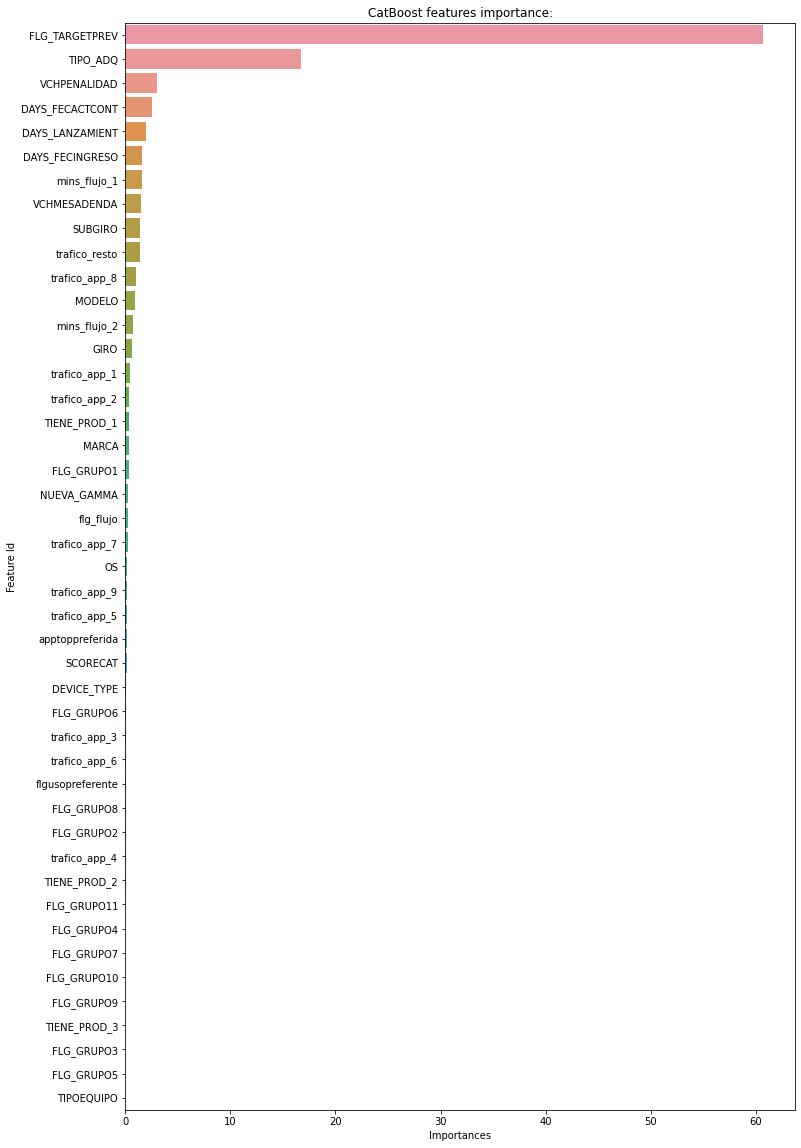

In [ ]:
plt.figure(figsize=(12, 20));
sns.barplot(x="Importances", y="Feature Id", data=fi);
plt.title('CatBoost features importance:')

In [ ]:
# fi = model.get_feature_importance(prettified=True)

In [ ]:
# plt.figure(figsize=(12, 20));
# sns.barplot(x="Importances", y="Feature Id", data=fi);
# plt.title('CatBoost features importance:');

In [ ]:
# val_x['TIPO_ADQ'].value_counts(normalize=True)
# train_x['TIPO_ADQ'].value_counts(normalize=True)

In [ ]:
# exportar_final = pd.DataFrame(
#     {'nro_telefono_hash' : dfSubmit["nro_telefono_hash"],
#      'TARGET'            : y_pred
#     })

# exportar_final.to_csv('Submit20220813_V5.csv', index=False)

In [ ]:
params = {'loss_function': 'Logloss',     # objective function
          'eval_metric'  : 'AUC',           # metric
          'cat_features' : cat_features,  # categorical columns
        #  'early_stopping_rounds': 200  ,  # maximun interations to look for improvement
        #  'verbose'              : 200  ,                # output to stdout info about training process every 200 iterations
        #  'scale_pos_weight'     : 32     ,  ## 32
          'scale_pos_weight'     : 15     ,
          'random_seed'          : 1      ,
          'learning_rate'        : 0.015  ,
          'iterations'           : 1000   ,
          'depth'                : 5      ,
          'l2_leaf_reg'          : 7.5    , 
          'max_bin'              : 300    ,
          'subsample'            : 0.9    
          ## ,'task_type'            : 'GPU'  
         }


N_FOLDS = 10

oof  = np.zeros(dfTrain.shape[0])
oof2 = np.zeros(dfTrain.shape[0])
pred = 0
skf  = StratifiedKFold(n_splits = N_FOLDS , shuffle = True , random_state = SEED)


for fold , (trn_idx , val_idx) in enumerate(skf.split(data , target)):
    print(f'========FOLD{fold}========')
    
    train_x = data.iloc[trn_idx]
    train_y = target.iloc[trn_idx]
    val_x   = data.iloc[val_idx]
    val_y   = target.iloc[val_idx]
    
    model   = CatBoostClassifier(**params)
    model.fit( train_x , train_y,
               eval_set = [(val_x,val_y)],              
               use_best_model = True ,
               early_stopping_rounds = EARLY_STOPPING_ROUNDS,
               verbose = VERBOSE
             )
    oof[val_idx]  = model.predict_proba(val_x)[: , 1]
    oof2[trn_idx] = model.predict_proba(train_x)[: , 1]
    
    
    pred += model.predict_proba(test_data)[: , 1]/N_FOLDS
    score  = roc_auc_score(val_y , oof[val_idx]  , average = 'micro')
    score2 = roc_auc_score(train_y , oof2[trn_idx] , average = 'micro')
    print(f'FOLD {fold}  AUCTRAINING {score2}  AUC {score} \n')
    
score = roc_auc_score(target , oof , average = 'micro')
print(f'AUC {score}\n')         

========FOLD0========
0:	test: 0.7483153	best: 0.7483153 (0)	total: 918ms	remaining: 15m 17s
100:	test: 0.7698281	best: 0.7699461 (98)	total: 1m 23s	remaining: 12m 23s
200:	test: 0.7800883	best: 0.7800883 (200)	total: 2m 58s	remaining: 11m 48s
300:	test: 0.7868047	best: 0.7868047 (300)	total: 4m 36s	remaining: 10m 41s
400:	test: 0.7919510	best: 0.7919510 (400)	total: 6m 12s	remaining: 9m 15s
500:	test: 0.7936830	best: 0.7936830 (500)	total: 7m 46s	remaining: 7m 44s
600:	test: 0.7953991	best: 0.7953991 (600)	total: 9m 21s	remaining: 6m 12s
700:	test: 0.7972450	best: 0.7972465 (698)	total: 10m 54s	remaining: 4m 39s
800:	test: 0.7985375	best: 0.7985375 (800)	total: 12m 30s	remaining: 3m 6s
900:	test: 0.8002840	best: 0.8002957 (899)	total: 14m 7s	remaining: 1m 33s
999:	test: 0.8010824	best: 0.8011010 (987)	total: 15m 46s	remaining: 0us

bestTest = 0.8011010318
bestIteration = 987

Shrink model to first 988 iterations.
FOLD 0  AUCTRAINING 0.8421363414222081  AUC 0.8011010318149849 

=======

KeyboardInterrupt: ignored